## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

In [16]:
taxi_data = pd.read_csv("data/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [17]:
# ваш код здесь

# Переводим pickup_datetime в тип datetime
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

# Определяем временные рамки данных (без учета времени)
min_date = taxi_data['pickup_datetime'].dt.date.min()
max_date = taxi_data['pickup_datetime'].dt.date.max()

print(f"Данные представлены за период с {min_date} по {max_date}")
print(f"Минимальная дата: {min_date}")
print(f"Максимальная дата: {max_date}")

Данные представлены за период с 2016-01-01 по 2016-06-30
Минимальная дата: 2016-01-01
Максимальная дата: 2016-06-30


### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [18]:
# Проверяем количество пропусков в данных
missing_values = taxi_data.isnull().sum()
total_missing = missing_values.sum()

print("Количество пропусков по столбцам:")
print(missing_values)
print(f"\nОбщее количество пропущенных значений: {total_missing}")


Количество пропусков по столбцам:
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Общее количество пропущенных значений: 0


### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [19]:
# ваш код здесь

# Сколько уникальных таксопарков присутствует в данных
display(taxi_data['vendor_id'].unique())

# Каково максимальное количество пассажиров
display(taxi_data['passenger_count'].max())

# Статистическое описание целевой переменной trip_duration
display(taxi_data['trip_duration'].describe())
display(taxi_data['trip_duration'].median())

array([2, 1])

np.int64(9)

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

np.float64(662.0)

Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - порядковый номер дня недели (число), в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [20]:
def add_datetime_features(data):
    """
    Функция добавляет временные признаки на основе столбца pickup_datetime
    
    Parameters:
    data (DataFrame): Таблица с данными о поездках
    
    Returns:
    DataFrame: Таблица с добавленными временными признаками
    """
    # Создаем копию данных для безопасности
    df = data.copy()
    
    # Добавляем дату без времени
    df['pickup_date'] = df['pickup_datetime'].dt.date
    
    # Добавляем час дня
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    
    # Добавляем порядковый номер дня недели (понедельник = 0, воскресенье = 6)
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek
    
    return df

# Применяем функцию к нашим данным
taxi_data = add_datetime_features(taxi_data)

# а) Сколько поездок было совершено в субботу (5 - суббота)
saturday_trips = (taxi_data['pickup_day_of_week'] == 5).sum()
print(f"Количество поездок в субботу: {saturday_trips}")

# б) Сколько поездок в среднем совершается в день
trips_per_day = taxi_data.groupby('pickup_date').size()
avg_trips_per_day = trips_per_day.mean()
print(f"Среднее количество поездок в день: {round(avg_trips_per_day)}")

# Дополнительная информация
print(f"\nИнформация о временных признаках:")
print(f"Уникальные дни недели: {sorted(taxi_data['pickup_day_of_week'].unique())}")
print(f"Диапазон часов: {taxi_data['pickup_hour'].min()} - {taxi_data['pickup_hour'].max()}")
print(f"Количество уникальных дат: {taxi_data['pickup_date'].nunique()}")

Количество поездок в субботу: 220868
Среднее количество поездок в день: 8015

Информация о временных признаках:
Уникальные дни недели: [np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6)]
Диапазон часов: 0 - 23
Количество уникальных дат: 182


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [21]:
holiday_data = pd.read_csv('data/holiday_data.csv', sep=';')

def add_holiday_features(trips_data, holidays_data):
    """
    Функция добавляет признак праздничного дня на основе данных о праздниках
    
    Parameters:
    trips_data (DataFrame): Таблица с данными о поездках
    holidays_data (DataFrame): Таблица с данными о праздничных днях
    
    Returns:
    DataFrame: Таблица с добавленным признаком pickup_holiday
    """
    # Создаем копию данных для безопасности
    df = trips_data.copy()
    
    # Преобразуем столбец с праздниками в тип datetime и извлекаем дату
    holidays_data['date'] = pd.to_datetime(holidays_data['date']).dt.date
    
    # Создаем множество праздничных дат для быстрого поиска
    holiday_dates = set(holidays_data['date'])
    
    # Добавляем бинарный признак: 1 если поездка начата в праздничный день, 0 - иначе
    df['pickup_holiday'] = df['pickup_date'].apply(lambda x: 1 if x in holiday_dates else 0)
    
    return df

# Применяем функцию к нашим данным
taxi_data = add_holiday_features(taxi_data, holiday_data)

# Рассчитываем медианную длительность поездки в праздничные дни
holiday_trips = taxi_data[taxi_data['pickup_holiday'] == 1]
median_holiday_duration = holiday_trips['trip_duration'].median()

print(f"Медианная длительность поездки в праздничные дни: {round(median_holiday_duration)} секунд")

# Дополнительная информация
print(f"\nДополнительная статистика:")
print(f"Общее количество поездок: {len(taxi_data)}")
print(f"Количество поездок в праздничные дни: {len(holiday_trips)}")
print(f"Процент поездок в праздничные дни: {len(holiday_trips) / len(taxi_data) * 100:.2f}%")
print(f"Количество праздничных дней в данных: {len(holiday_data)}")

# Показываем несколько праздников для проверки
print(f"\nПримеры праздников в данных:")
print(holiday_data.head())

Медианная длительность поездки в праздничные дни: 585 секунд

Дополнительная статистика:
Общее количество поездок: 1458644
Количество поездок в праздничные дни: 51122
Процент поездок в праздничные дни: 3.50%
Количество праздничных дней в данных: 14

Примеры праздников в данных:
      day        date                     holiday
0  Friday  2016-01-01               New Years Day
1  Monday  2016-01-18  Martin Luther King Jr. Day
2  Friday  2016-02-12          Lincoln's Birthday
3  Monday  2016-02-15             Presidents' Day
4  Sunday  2016-05-08                Mother's Day


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [22]:
osrm_data = pd.read_csv('data/osrm_data_train.csv')

def add_osrm_features(trips_data, osrm_data):
    """
    Функция добавляет признаки из OSRM API к данным о поездках
    
    Parameters:
    trips_data (DataFrame): Таблица с данными о поездках
    osrm_data (DataFrame): Таблица с данными из OSRM API
    
    Returns:
    DataFrame: Таблица с добавленными признаками из OSRM
    """
    # Создаем копию данных для безопасности
    df = trips_data.copy()
    
    # Выделяем необходимые столбцы из OSRM данных
    osrm_features = osrm_data[['id', 'total_distance', 'total_travel_time', 'number_of_steps']].copy()
    
    # Объединяем таблицы по столбцу id с типом left join
    df = df.merge(osrm_features, on='id', how='left')
    
    return df

# Применяем функцию к нашим данным
taxi_data = add_osrm_features(taxi_data, osrm_data)

# а) Разница между медианной длительностью поездки и медианной из OSRM
median_trip_duration = taxi_data['trip_duration'].median()
median_osrm_duration = taxi_data['total_travel_time'].median()
duration_difference = median_trip_duration - median_osrm_duration

print(f"Медианная длительность поездки в исходных данных: {median_trip_duration:.1f} секунд")
print(f"Медианная длительность поездки из OSRM: {median_osrm_duration:.1f} секунд")
print(f"Разница: {round(duration_difference)} секунд")

# б) Количество пропусков в столбцах OSRM после объединения
osrm_columns = ['total_distance', 'total_travel_time', 'number_of_steps']
missing_counts = taxi_data[osrm_columns].isnull().sum()
rows_with_missing = taxi_data[osrm_columns].isnull().any(axis=1).sum()

print(f"\nПропуски в столбцах OSRM:")
for col in osrm_columns:
    print(f"{col}: {missing_counts[col]} пропусков")

print(f"\nКоличество строк с пропусками в OSRM столбцах: {rows_with_missing}")

# Дополнительная информация
print(f"\nДополнительная статистика:")
print(f"Общее количество поездок: {len(taxi_data)}")
print(f"Процент строк с пропусками OSRM: {rows_with_missing / len(taxi_data) * 100:.2f}%")
print(f"Размер OSRM данных: {len(osrm_data)}")

# Показываем структуру данных OSRM
print(f"\nСтруктура OSRM данных:")
print(osrm_data.head())

Медианная длительность поездки в исходных данных: 662.0 секунд
Медианная длительность поездки из OSRM: 289.5 секунд
Разница: 372 секунд

Пропуски в столбцах OSRM:
total_distance: 1 пропусков
total_travel_time: 1 пропусков
number_of_steps: 1 пропусков

Количество строк с пропусками в OSRM столбцах: 1

Дополнительная статистика:
Общее количество поездок: 1458644
Процент строк с пропусками OSRM: 0.00%
Размер OSRM данных: 1458643

Структура OSRM данных:
          id   starting_street              end_street  total_distance  \
0  id2875421   Columbus Circle        East 65th Street          2009.1   
1  id2377394        2nd Avenue  Washington Square West          2513.2   
2  id3504673  Greenwich Street                Broadway          1779.4   
3  id2181028          Broadway        West 81st Street          1614.9   
4  id0801584  Lexington Avenue        West 31st Street          1393.5   

   total_travel_time  number_of_steps  \
0              164.9                5   
1              332.

In [23]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [24]:
def add_geographical_features(data):
    """
    Функция добавляет географические признаки на основе координат поездок
    
    Parameters:
    data (DataFrame): Таблица с данными о поездках
    
    Returns:
    DataFrame: Таблица с добавленными географическими признаками
    """
    # Создаем копию данных для безопасности
    df = data.copy()
    
    # Вычисляем расстояние Хаверсина между точками начала и окончания поездки
    df['haversine_distance'] = get_haversine_distance(
        df['pickup_latitude'], 
        df['pickup_longitude'],
        df['dropoff_latitude'], 
        df['dropoff_longitude']
    )
    
    # Вычисляем направление движения (угол пеленга)
    df['direction'] = get_angle_direction(
        df['pickup_latitude'], 
        df['pickup_longitude'],
        df['dropoff_latitude'], 
        df['dropoff_longitude']
    )
    
    return df

# Применяем функцию к нашим данным
taxi_data = add_geographical_features(taxi_data)

# Вычисляем медианное расстояние Хаверсина в километрах
median_haversine_distance = taxi_data['haversine_distance'].median()

print(f"Медианное расстояние Хаверсина поездок: {median_haversine_distance:.2f} км")

# Дополнительная статистика для анализа
print(f"\nСтатистика географических признаков:")
print(f"Минимальное расстояние Хаверсина: {taxi_data['haversine_distance'].min():.2f} км")
print(f"Максимальное расстояние Хаверсина: {taxi_data['haversine_distance'].max():.2f} км")
print(f"Среднее расстояние Хаверсина: {taxi_data['haversine_distance'].mean():.2f} км")

print(f"\nСтатистика по направлению движения:")
print(f"Минимальный угол направления: {taxi_data['direction'].min():.1f}°")
print(f"Максимальный угол направления: {taxi_data['direction'].max():.1f}°")
print(f"Средний угол направления: {taxi_data['direction'].mean():.1f}°")

# Показываем несколько примеров вычисленных значений
print(f"\nПримеры вычисленных географических признаков:")
print(taxi_data[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 
                 'haversine_distance', 'direction']].head())

Медианное расстояние Хаверсина поездок: 2.09 км

Статистика географических признаков:
Минимальное расстояние Хаверсина: 0.00 км
Максимальное расстояние Хаверсина: 1240.91 км
Среднее расстояние Хаверсина: 3.44 км

Статистика по направлению движения:
Минимальный угол направления: -180.0°
Максимальный угол направления: 180.0°
Средний угол направления: -15.7°

Примеры вычисленных географических признаков:
   pickup_latitude  pickup_longitude  dropoff_latitude  dropoff_longitude  \
0        40.767937        -73.982155         40.765602         -73.964630   
1        40.738564        -73.980415         40.731152         -73.999481   
2        40.763939        -73.979027         40.710087         -74.005333   
3        40.719971        -74.010040         40.706718         -74.012268   
4        40.793209        -73.973053         40.782520         -73.972923   

   haversine_distance   direction  
0            1.498521   99.970196  
1            1.805507 -117.153768  
2            6.385098 -1

### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [25]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

def add_cluster_features(data, kmeans_model):
    """
    Функция добавляет географические кластеры к данным о поездках
    
    Parameters:
    data (DataFrame): Таблица с данными о поездках
    kmeans_model: Обученная модель кластеризации K-means
    
    Returns:
    DataFrame: Таблица с добавленным столбцом geo_cluster
    """
    # Создаем копию данных для безопасности
    df = data.copy()
    
    # Подготавливаем координаты в том же формате, что использовался для обучения
    # Объединяем координаты начала и окончания поездок
    trip_coords = np.hstack((df[['pickup_latitude', 'pickup_longitude']].values,
                            df[['dropoff_latitude', 'dropoff_longitude']].values))
    
    # Предсказываем кластеры для каждой поездки
    clusters = kmeans_model.predict(trip_coords)
    
    # Добавляем предсказанные кластеры в DataFrame
    df['geo_cluster'] = clusters
    
    return df

# Применяем функцию к нашим данным
taxi_data = add_cluster_features(taxi_data, kmeans)

# Анализируем распределение поездок по кластерам
cluster_counts = taxi_data['geo_cluster'].value_counts().sort_values()
min_cluster_size = cluster_counts.min()
min_cluster_id = cluster_counts.idxmin()

print(f"Количество поездок в наименьшем по размеру географическом кластере: {min_cluster_size}")
print(f"Номер наименьшего кластера: {min_cluster_id}")

# Дополнительная статистика по кластерам
print(f"\nРаспределение поездок по кластерам:")
print(cluster_counts.sort_index())

print(f"\nСтатистика кластеров:")
print(f"Общее количество кластеров: {taxi_data['geo_cluster'].nunique()}")
print(f"Средний размер кластера: {taxi_data['geo_cluster'].value_counts().mean():.0f}")
print(f"Максимальный размер кластера: {cluster_counts.max()}")

# Показываем несколько примеров с географическими кластерами
print(f"\nПримеры данных с географическими кластерами:")
print(taxi_data[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'geo_cluster']].head(10))

Количество поездок в наименьшем по размеру географическом кластере: 2
Номер наименьшего кластера: 1

Распределение поездок по кластерам:
geo_cluster
0    595850
1         2
2     32769
3     40671
4         4
5         3
6    405045
7     45791
8     15510
9    322999
Name: count, dtype: int64

Статистика кластеров:
Общее количество кластеров: 10
Средний размер кластера: 145864
Максимальный размер кластера: 595850

Примеры данных с географическими кластерами:
   pickup_latitude  pickup_longitude  dropoff_latitude  dropoff_longitude  \
0        40.767937        -73.982155         40.765602         -73.964630   
1        40.738564        -73.980415         40.731152         -73.999481   
2        40.763939        -73.979027         40.710087         -74.005333   
3        40.719971        -74.010040         40.706718         -74.012268   
4        40.793209        -73.973053         40.782520         -73.972923   
5        40.742195        -73.982857         40.749184         -73.992081 

### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [29]:
weather_data = pd.read_csv('data/weather_data.csv')
weather_data.head()

,time,temperature,windchill,heat index,humidity,pressure,dew Point,visibility,wind dir,wind speed,gust speed,precip,events,conditions,date,hour
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,NaN,Overcast,2015-12-31,2
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,NaN,Overcast,2015-12-31,3
2,2015-12-31 04:00:00,7.2,NaN,NaN,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,NaN,Overcast,2015-12-31,4
3,2015-12-31 05:00:00,7.2,5.9,NaN,0.86,1015.9,5.0,14.5,NW,7.4,0.0,0.0,NaN,Overcast,2015-12-31,5
4,2015-12-31 06:00:00,7.2,6.4,NaN,0.90,1016.2,5.6,11.3,West,5.6,0.0,0.0,NaN,Overcast,2015-12-31,6


In [ ]:
def add_weather_features(trips_data, weather_data):
    """
    Функция добавляет погодные признаки к данным о поездках
    
    Parameters:
    trips_data (DataFrame): Таблица с данными о поездках
    weather_data (DataFrame): Таблица с данными о погодных условиях
    
    Returns:
    DataFrame: Таблица с добавленными погодными признаками
    """
    # Создаем копию данных для безопасности
    df = trips_data.copy()
    weather_df = weather_data.copy()
    
    # Найдем правильное название столбца с временем
    time_column = None
    possible_names = ['datetime', 'date', 'time', 'Date', 'DateTime']
    for col in weather_df.columns:
        if any(name.lower() in col.lower() for name in possible_names):
            time_column = col
            break
    
    if time_column is None:
        # Если не найден столбец с временем, берем первый столбец
        time_column = weather_df.columns[0]
    
    print(f"Используемый столбец времени: {time_column}")
    print(f"Столбцы в погодных данных: {weather_df.columns.tolist()}")
    
    # Преобразуем время в погодных данных в datetime
    weather_df['datetime_parsed'] = pd.to_datetime(weather_df[time_column])
    
    # Создаем столбцы для объединения: дата и час
    weather_df['pickup_date'] = weather_df['datetime_parsed'].dt.date
    weather_df['pickup_hour'] = weather_df['datetime_parsed'].dt.hour
    
    # Найдем нужные столбцы с погодными данными
    weather_columns_mapping = {}
    target_columns = ['temperature', 'visibility', 'wind speed', 'precip', 'events']
    
    for target_col in target_columns:
        found_col = None
        for col in weather_df.columns:
            if target_col.lower().replace(' ', '') in col.lower().replace(' ', ''):
                found_col = col
                break
        if found_col:
            weather_columns_mapping[target_col] = found_col
    
    print(f"Найденные столбцы погоды: {weather_columns_mapping}")
    
    # Выбираем нужные столбцы из погодных данных и переименовываем их
    weather_features = weather_df[['pickup_date', 'pickup_hour']].copy()
    
    for target_name, source_name in weather_columns_mapping.items():
        weather_features[target_name] = weather_df[source_name]
    
    # Объединяем таблицы по дате и часу с типом left join
    df = df.merge(weather_features, on=['pickup_date', 'pickup_hour'], how='left')
    
    return df

# Применяем функцию к нашим данным
taxi_data = add_weather_features(taxi_data, weather_data)

# а) Сколько поездок было совершено в снежную погоду
# Ищем поездки, где в events содержится информация о снеге
if 'events' in taxi_data.columns:
    snow_trips = taxi_data[taxi_data['events'].str.contains('Snow', na=False, case=False)]
    num_snow_trips = len(snow_trips)
    print(f"\nКоличество поездок в снежную погоду: {num_snow_trips}")
else:
    print("\nСтолбец 'events' не найден в данных")
    num_snow_trips = 0

# б) Процент пропусков в погодных столбцах
weather_columns = ['temperature', 'visibility', 'wind speed', 'precip', 'events']
existing_weather_columns = [col for col in weather_columns if col in taxi_data.columns]

if existing_weather_columns:
    total_observations = len(taxi_data)
    
    # Подсчитываем пропуски в каждом столбце
    missing_counts = taxi_data[existing_weather_columns].isnull().sum()
    rows_with_missing = taxi_data[existing_weather_columns].isnull().any(axis=1).sum()
    
    print(f"\nПропуски в столбцах с погодными условиями:")
    for col in existing_weather_columns:
        missing_count = missing_counts[col]
        missing_percentage = (missing_count / total_observations) * 100
        print(f"{col}: {missing_count} пропусков ({missing_percentage:.2f}%)")
    
    # Процент строк с хотя бы одним пропуском в погодных данных
    rows_missing_percentage = (rows_with_missing / total_observations) * 100
    print(f"\nОбщее количество строк с пропусками в погодных столбцах: {rows_with_missing}")
    print(f"Процент строк с пропусками в погодных данных: {rows_missing_percentage:.2f}%")
    
    # Дополнительная информация для анализа
    print(f"\nДополнительная статистика:")
    print(f"Общее количество поездок: {total_observations}")
    print(f"Размер таблицы с погодными данными: {len(weather_data)}")
    
    # Показываем уникальные погодные явления, если столбец events существует
    if 'events' in taxi_data.columns:
        unique_events = taxi_data['events'].dropna().unique()
        print(f"\nУникальные погодные явления:")
        for event in sorted(unique_events):
            if event and str(event) != 'nan':
                count = (taxi_data['events'] == event).sum()
                print(f"  {event}: {count} поездок")
else:
    print("Не найдены ожидаемые столбцы с погодными данными")

# Показываем примеры объединенных данных
print(f"\nПримеры объединенных данных с погодой:")
weather_cols_to_show = [col for col in ['pickup_date', 'pickup_hour'] + existing_weather_columns if col in taxi_data.columns]
if weather_cols_to_show:
    print(taxi_data[weather_cols_to_show].head())

Используемый столбец времени: time
Столбцы в погодных данных: ['time', 'temperature', 'windchill', 'heat index', 'humidity', 'pressure', 'dew Point', 'visibility', 'wind dir', 'wind speed', 'gust speed', 'precip', 'events', 'conditions', 'date', 'hour']
Найденные столбцы погоды: {'temperature': 'temperature', 'visibility': 'visibility', 'wind speed': 'wind speed', 'precip': 'precip', 'events': 'events'}

Количество поездок в снежную погоду: 13126

Пропуски в столбцах с погодными условиями:
temperature: 12032 пропусков (0.82%)
visibility: 12032 пропусков (0.82%)
wind speed: 12032 пропусков (0.82%)
precip: 12032 пропусков (0.82%)
events: 1387217 пропусков (95.10%)

Общее количество строк с пропусками в погодных столбцах: 1387217
Процент строк с пропусками в погодных данных: 95.10%

Дополнительная статистика:
Общее количество поездок: 1458644
Размер таблицы с погодными данными: 8787

Уникальные погодные явления:
  Fog: 1 поездок
  Rain: 58300 поездок

Количество поездок в снежную погоду: 

### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [31]:
def fill_null_weather_data(data):
    """
    Функция заполняет пропущенные значения в данных о поездках
    
    Parameters:
    data (DataFrame): Таблица с данными о поездках
    
    Returns:
    DataFrame: Таблица с заполненными пропусками
    """
    # Создаем копию данных для безопасности
    df = data.copy()
    
    # Столбцы с погодными условиями для заполнения медианой по дате
    weather_columns = ['temperature', 'visibility', 'wind speed', 'precip']
    
    # Заполняем пропуски в погодных столбцах медианными значениями по дате
    for col in weather_columns:
        if col in df.columns:
            # Заполняем медианой по группам pickup_date
            df[col] = df[col].fillna(
                df.groupby('pickup_date')[col].transform('median')
            )
            print(f"Заполнены пропуски в столбце {col}")
    
    # Заполняем пропуски в столбце events строкой 'None'
    if 'events' in df.columns:
        df['events'] = df['events'].fillna('None')
        print("Заполнены пропуски в столбце events")
    
    # Столбцы с информацией из OSRM API для заполнения общей медианой
    osrm_columns = ['total_distance', 'total_travel_time', 'number_of_steps']
    
    # Заполняем пропуски в OSRM столбцах медианными значениями по столбцам
    for col in osrm_columns:
        if col in df.columns:
            median_value = df[col].median()
            df[col] = df[col].fillna(median_value)
            print(f"Заполнены пропуски в столбце {col} значением {median_value}")
    
    return df

# Применяем функцию к нашим данным
print("Заполнение пропущенных значений...")
taxi_data = fill_null_weather_data(taxi_data)

# Проверяем медиану в столбце temperature после заполнения пропусков
if 'temperature' in taxi_data.columns:
    temperature_median = taxi_data['temperature'].median()
    print(f"\nМедиана в столбце temperature после заполнения пропусков: {temperature_median:.1f}")
else:
    print("Столбец temperature не найден в данных")

# Проверяем статистику заполнения пропусков
print(f"\nСтатистика пропусков после заполнения:")

# Проверяем погодные столбцы
weather_columns = ['temperature', 'visibility', 'wind speed', 'precip', 'events']
existing_weather_columns = [col for col in weather_columns if col in taxi_data.columns]

for col in existing_weather_columns:
    missing_count = taxi_data[col].isnull().sum()
    print(f"{col}: {missing_count} пропусков")

# Проверяем OSRM столбцы
osrm_columns = ['total_distance', 'total_travel_time', 'number_of_steps']
existing_osrm_columns = [col for col in osrm_columns if col in taxi_data.columns]

for col in existing_osrm_columns:
    missing_count = taxi_data[col].isnull().sum()
    print(f"{col}: {missing_count} пропусков")

# Дополнительная статистика по температуре
if 'temperature' in taxi_data.columns:
    print(f"\nДополнительная статистика по температуре:")
    print(f"Минимальная температура: {taxi_data['temperature'].min():.1f}")
    print(f"Максимальная температура: {taxi_data['temperature'].max():.1f}")
    print(f"Средняя температура: {taxi_data['temperature'].mean():.1f}")
    print(f"Медианная температура: {taxi_data['temperature'].median():.1f}")

# Проверяем, что все основные пропуски заполнены
total_missing = taxi_data.isnull().sum().sum()
print(f"\nОбщее количество пропусков в данных после заполнения: {total_missing}")

# Показываем примеры заполненных данных
print(f"\nПримеры данных после заполнения пропусков:")
cols_to_show = ['pickup_date', 'pickup_hour'] + existing_weather_columns[:3]
cols_to_show = [col for col in cols_to_show if col in taxi_data.columns]
if cols_to_show:
    print(taxi_data[cols_to_show].head())

Заполнение пропущенных значений...
Заполнены пропуски в столбце temperature
Заполнены пропуски в столбце visibility
Заполнены пропуски в столбце wind speed
Заполнены пропуски в столбце temperature
Заполнены пропуски в столбце visibility
Заполнены пропуски в столбце wind speed
Заполнены пропуски в столбце precip
Заполнены пропуски в столбце events
Заполнены пропуски в столбце total_distance значением 2755.1
Заполнены пропуски в столбце total_travel_time значением 289.5
Заполнены пропуски в столбце number_of_steps значением 6.0
Заполнены пропуски в столбце precip
Заполнены пропуски в столбце events
Заполнены пропуски в столбце total_distance значением 2755.1
Заполнены пропуски в столбце total_travel_time значением 289.5
Заполнены пропуски в столбце number_of_steps значением 6.0

Медиана в столбце temperature после заполнения пропусков: 11.1

Статистика пропусков после заполнения:
temperature: 0 пропусков
visibility: 0 пропусков
wind speed: 0 пропусков
precip: 0 пропусков
events: 0 пропус

В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


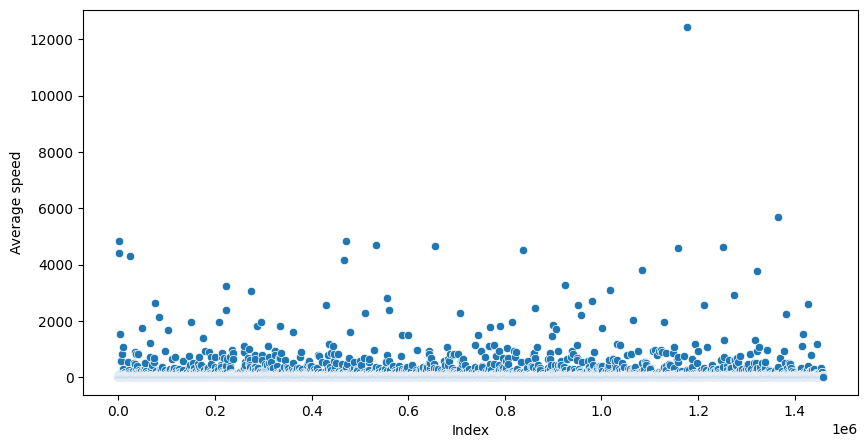

In [32]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [33]:
# Исходное количество поездок
initial_count = len(taxi_data)
print(f"Исходное количество поездок: {initial_count}")

# 1. Находим и удаляем поездки, длительность которых превышает 24 часа
# 24 часа = 24 * 60 * 60 = 86400 секунд
duration_threshold = 24 * 60 * 60  # 86400 секунд

# Находим поездки с длительностью более 24 часов
long_duration_outliers = taxi_data[taxi_data['trip_duration'] > duration_threshold]
num_duration_outliers = len(long_duration_outliers)

print(f"\n1. Анализ выбросов по длительности поездки:")
print(f"Поездки длительностью более 24 часов: {num_duration_outliers}")

# Удаляем выбросы по длительности
taxi_data = taxi_data[taxi_data['trip_duration'] <= duration_threshold]
count_after_duration_filter = len(taxi_data)
print(f"Количество поездок после удаления выбросов по длительности: {count_after_duration_filter}")

# 2. Находим и удаляем поездки со средней скоростью более 300 км/ч
# Рассчитываем среднюю скорость: avg_speed = (total_distance / trip_duration) * 3.6
# где total_distance в метрах, trip_duration в секундах, результат в км/ч

# Вычисляем среднюю скорость
taxi_data['avg_speed'] = (taxi_data['total_distance'] / taxi_data['trip_duration']) * 3.6

# Находим поездки со скоростью более 300 км/ч
speed_threshold = 300  # км/ч
speed_outliers = taxi_data[taxi_data['avg_speed'] > speed_threshold]
num_speed_outliers = len(speed_outliers)

print(f"\n2. Анализ выбросов по средней скорости:")
print(f"Поездки со средней скоростью более 300 км/ч: {num_speed_outliers}")

# Показываем несколько примеров экстремальных скоростей
if num_speed_outliers > 0:
    print(f"\nПримеры экстремальных скоростей:")
    extreme_speeds = taxi_data[taxi_data['avg_speed'] > speed_threshold].nlargest(5, 'avg_speed')
    print(extreme_speeds[['trip_duration', 'total_distance', 'avg_speed']].round(2))

# Удаляем выбросы по скорости
taxi_data = taxi_data[taxi_data['avg_speed'] <= speed_threshold]
final_count = len(taxi_data)

print(f"\n3. Итоговые результаты:")
print(f"Количество поездок после удаления всех выбросов: {final_count}")
print(f"Общее количество удаленных записей: {initial_count - final_count}")

# Дополнительная статистика
print(f"\nДополнительная статистика по удаленным выбросам:")
print(f"- Выбросы по длительности (> 24 часов): {num_duration_outliers}")
print(f"- Выбросы по скорости (> 300 км/ч): {num_speed_outliers}")

# Проверяем статистику средней скорости после очистки
print(f"\nСтатистика средней скорости после очистки:")
print(f"Минимальная скорость: {taxi_data['avg_speed'].min():.2f} км/ч")
print(f"Максимальная скорость: {taxi_data['avg_speed'].max():.2f} км/ч")
print(f"Средняя скорость: {taxi_data['avg_speed'].mean():.2f} км/ч")
print(f"Медианная скорость: {taxi_data['avg_speed'].median():.2f} км/ч")

# Проверяем статистику длительности поездок после очистки
print(f"\nСтатистика длительности поездок после очистки:")
print(f"Минимальная длительность: {taxi_data['trip_duration'].min()} секунд")
print(f"Максимальная длительность: {taxi_data['trip_duration'].max()} секунд ({taxi_data['trip_duration'].max()/3600:.1f} часов)")
print(f"Средняя длительность: {taxi_data['trip_duration'].mean():.0f} секунд")
print(f"Медианная длительность: {taxi_data['trip_duration'].median():.0f} секунд")

# Удаляем временный столбец avg_speed, так как он больше не нужен для дальнейшего анализа
# (или оставляем, если может пригодиться в дальнейшем)
print(f"\nСтолбец 'avg_speed' создан для анализа выбросов")
print(f"Размерность данных после очистки: {taxi_data.shape}")

Исходное количество поездок: 1458644

1. Анализ выбросов по длительности поездки:
Поездки длительностью более 24 часов: 4
Количество поездок после удаления выбросов по длительности: 1458640

2. Анализ выбросов по средней скорости:
Поездки со средней скоростью более 300 км/ч: 407

Примеры экстремальных скоростей:
         trip_duration  total_distance  avg_speed
1176337              7         24166.3   12428.38
1366118              3          4753.0    5703.60
1107                 2          2693.5    4848.30
470771               2          2682.6    4828.68
533799               1          1304.1    4694.76
Количество поездок после удаления выбросов по длительности: 1458640

2. Анализ выбросов по средней скорости:
Поездки со средней скоростью более 300 км/ч: 407

Примеры экстремальных скоростей:
         trip_duration  total_distance  avg_speed
1176337              7         24166.3   12428.38
1366118              3          4753.0    5703.60
1107                 2          2693.5    48

## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [34]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

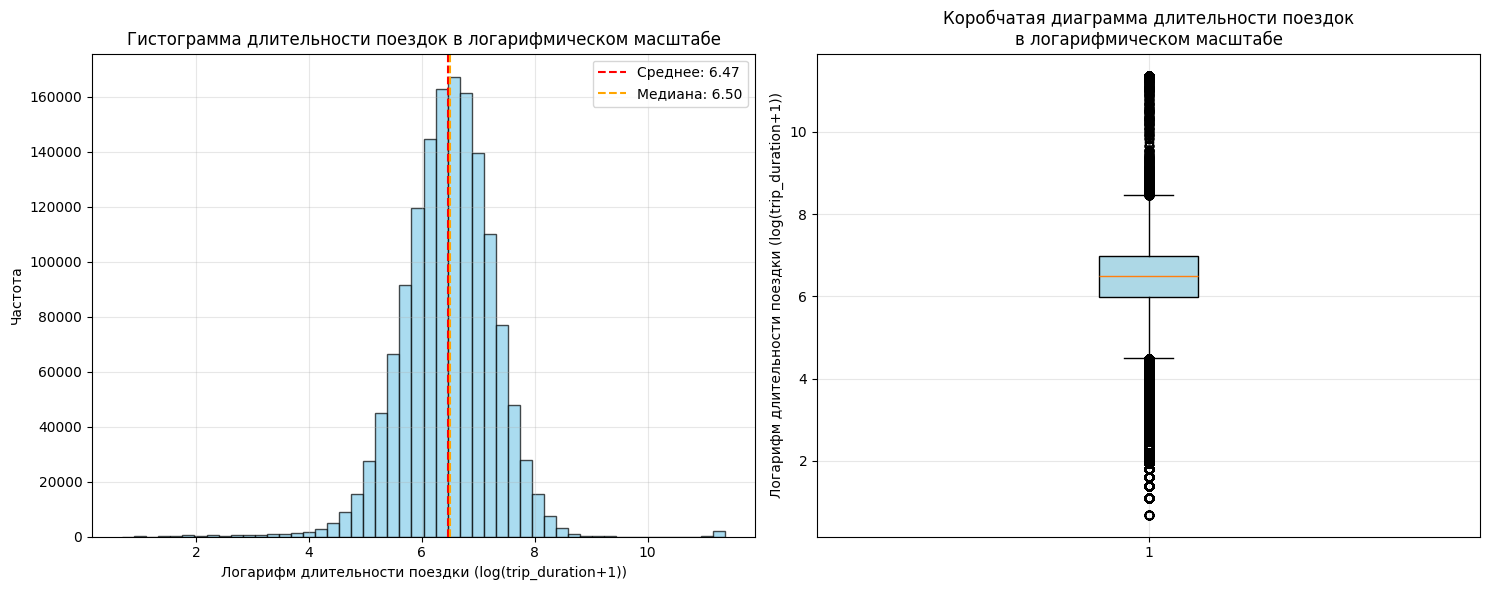

=== АНАЛИЗ НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ===
Размер выборки для теста: 50000
Статистика теста Д'Агостино: 4405.6849
P-value: 0.0000000000
P-value (округленный до сотых): 0.00

Уровень значимости α = 0.05
P-value (0.00) < α (0.05)
ВЫВОД: Отвергаем нулевую гипотезу о нормальности
Распределение НЕ является нормальным

=== ОПИСАТЕЛЬНАЯ СТАТИСТИКА ===
Среднее значение: 6.4681
Медиана: 6.4983
Стандартное отклонение: 0.7925
Асимметрия (skewness): -0.2531
Эксцесс (kurtosis): 3.6601

=== ВИЗУАЛЬНАЯ ОЦЕНКА ===
✓ Среднее и медиана очень близки - признак нормального распределения
✓ Асимметрия близка к нулю - признак нормального распределения

=== ОТВЕТЫ НА ВОПРОСЫ ЗАДАНИЯ ===
а) P-value (округленный до сотых): 0.00
б) Распределение НЕ является нормальным (отвергаем H0 при α=0.05)


In [35]:
# Задание 3.1. Анализ распределения trip_duration_log

# Создаем фигуру с двумя подграфиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Гистограмма длительности поездок в логарифмическом масштабе
ax1.hist(taxi_data['trip_duration_log'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Логарифм длительности поездки (log(trip_duration+1))')
ax1.set_ylabel('Частота')
ax1.set_title('Гистограмма длительности поездок в логарифмическом масштабе')
ax1.grid(True, alpha=0.3)

# Добавляем статистику на график
mean_log = taxi_data['trip_duration_log'].mean()
median_log = taxi_data['trip_duration_log'].median()
ax1.axvline(mean_log, color='red', linestyle='--', label=f'Среднее: {mean_log:.2f}')
ax1.axvline(median_log, color='orange', linestyle='--', label=f'Медиана: {median_log:.2f}')
ax1.legend()

# 2. Коробчатая диаграмма (boxplot)
box_plot = ax2.boxplot(taxi_data['trip_duration_log'], patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightblue')
ax2.set_ylabel('Логарифм длительности поездки (log(trip_duration+1))')
ax2.set_title('Коробчатая диаграмма длительности поездок\nв логарифмическом масштабе')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Проверяем нормальность распределения с помощью теста Д'Агостино
from scipy.stats import normaltest

# Выполняем тест Д'Агостино
# Используем выборку для ускорения вычислений (тест может быть медленным на больших данных)
sample_size = min(50000, len(taxi_data))  # Берем выборку до 50,000 наблюдений
sample_data = taxi_data['trip_duration_log'].sample(n=sample_size, random_state=42)

statistic, p_value = normaltest(sample_data)

print("=== АНАЛИЗ НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ===")
print(f"Размер выборки для теста: {sample_size}")
print(f"Статистика теста Д'Агостино: {statistic:.4f}")
print(f"P-value: {p_value:.10f}")
print(f"P-value (округленный до сотых): {p_value:.2f}")

# Интерпретация результата
alpha = 0.05
print(f"\nУровень значимости α = {alpha}")

if p_value < alpha:
    print(f"P-value ({p_value:.2f}) < α ({alpha})")
    print("ВЫВОД: Отвергаем нулевую гипотезу о нормальности")
    print("Распределение НЕ является нормальным")
else:
    print(f"P-value ({p_value:.2f}) >= α ({alpha})")
    print("ВЫВОД: Не можем отвергнуть нулевую гипотезу о нормальности")
    print("Распределение может считаться нормальным")

# Дополнительная описательная статистика
print(f"\n=== ОПИСАТЕЛЬНАЯ СТАТИСТИКА ===")
print(f"Среднее значение: {taxi_data['trip_duration_log'].mean():.4f}")
print(f"Медиана: {taxi_data['trip_duration_log'].median():.4f}")
print(f"Стандартное отклонение: {taxi_data['trip_duration_log'].std():.4f}")
print(f"Асимметрия (skewness): {taxi_data['trip_duration_log'].skew():.4f}")
print(f"Эксцесс (kurtosis): {taxi_data['trip_duration_log'].kurtosis():.4f}")

# Визуальная оценка нормальности
print(f"\n=== ВИЗУАЛЬНАЯ ОЦЕНКА ===")
mean_val = taxi_data['trip_duration_log'].mean()
median_val = taxi_data['trip_duration_log'].median()

if abs(mean_val - median_val) < 0.1:
    print("✓ Среднее и медиана очень близки - признак нормального распределения")
else:
    print("✗ Среднее и медиана заметно различаются - признак ненормального распределения")

skew_val = abs(taxi_data['trip_duration_log'].skew())
if skew_val < 0.5:
    print("✓ Асимметрия близка к нулю - признак нормального распределения")
elif skew_val < 1:
    print("~ Умеренная асимметрия - отклонение от нормальности")
else:
    print("✗ Высокая асимметрия - сильное отклонение от нормальности")

# Ответы на вопросы задания
print(f"\n=== ОТВЕТЫ НА ВОПРОСЫ ЗАДАНИЯ ===")
print(f"а) P-value (округленный до сотых): {p_value:.2f}")
if p_value < alpha:
    print("б) Распределение НЕ является нормальным (отвергаем H0 при α=0.05)")
else:
    print("б) Распределение является нормальным (не отвергаем H0 при α=0.05)")

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

Уникальные значения vendor_id:
vendor_id
1    678115
2    780118
Name: count, dtype: int64


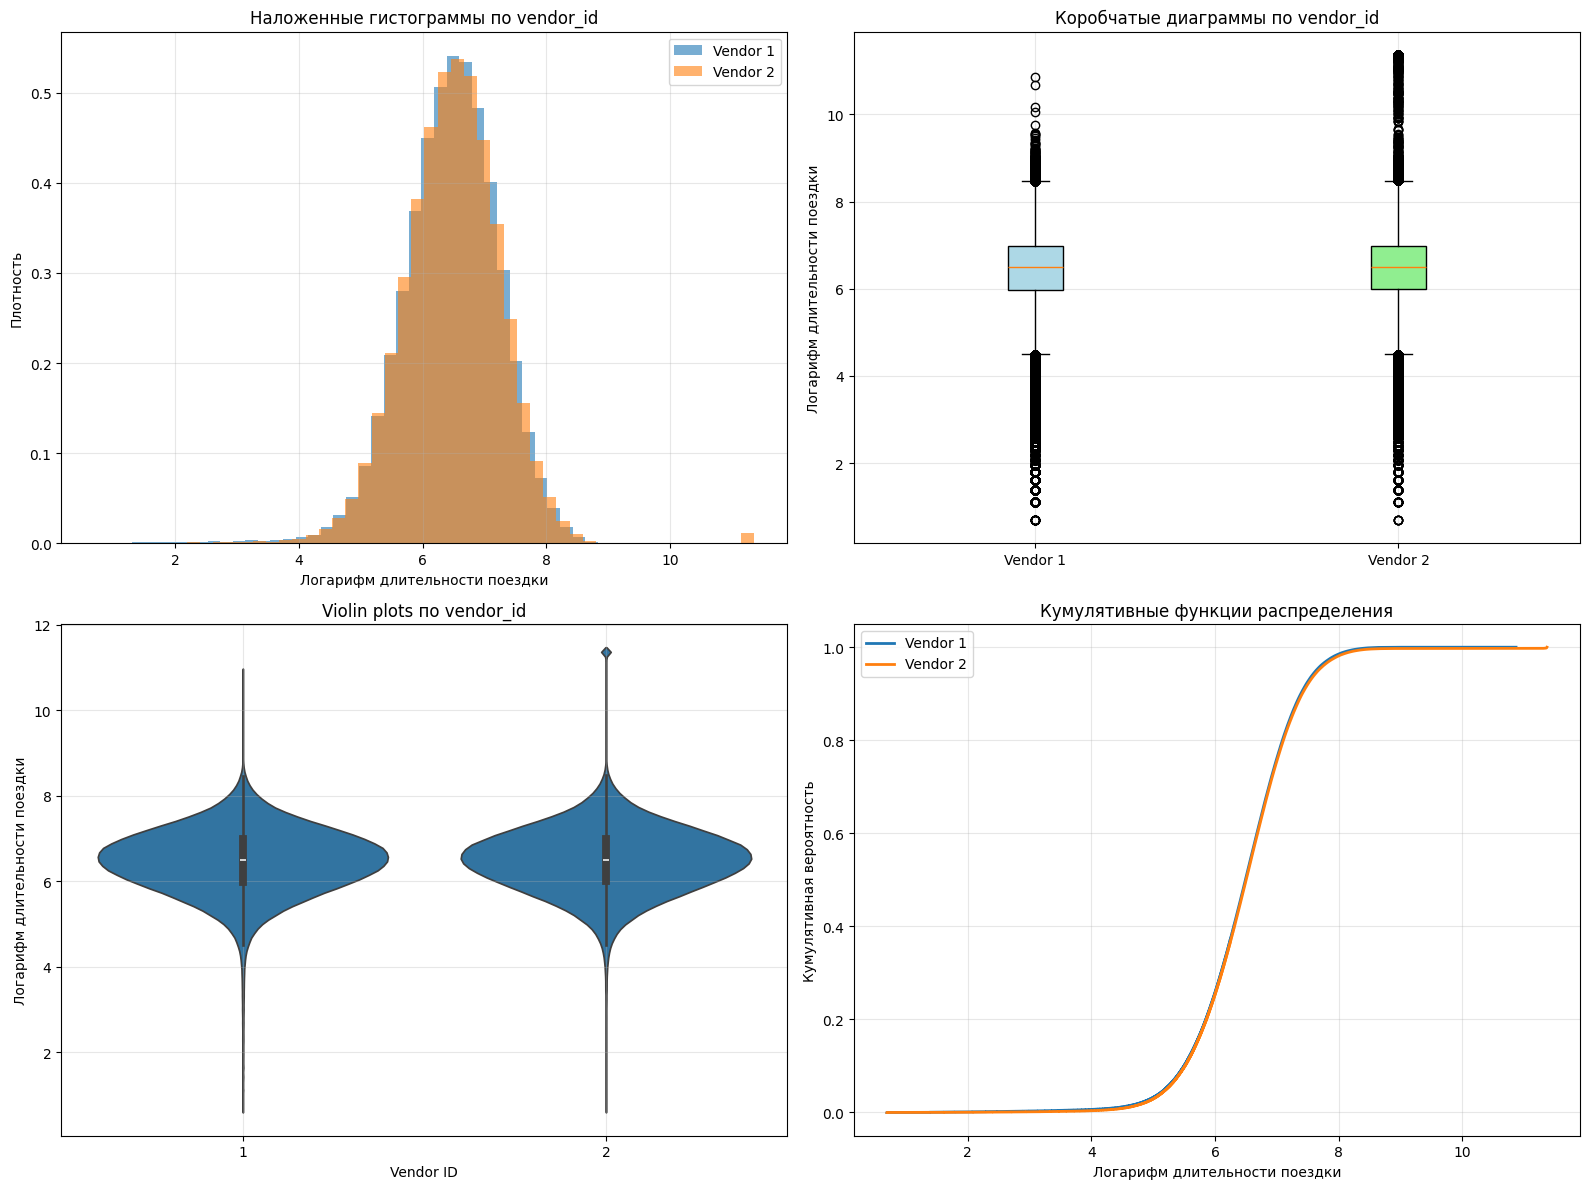


=== СТАТИСТИЧЕСКОЕ СРАВНЕНИЕ ГРУПП ===
   vendor_id   count    mean  median     std     min      max     q25     q75
0          1  678115  6.4515  6.4922  0.7840  0.6931  10.8662  5.9814  6.9745
1          2  780118  6.4826  6.5028  0.7995  0.6931  11.3667  5.9915  6.9884

=== РАЗНОСТИ МЕЖДУ ГРУППАМИ ===
Разность средних значений: 0.0312
Разность медиан: 0.0106
   vendor_id   count    mean  median     std     min      max     q25     q75
0          1  678115  6.4515  6.4922  0.7840  0.6931  10.8662  5.9814  6.9745
1          2  780118  6.4826  6.5028  0.7995  0.6931  11.3667  5.9915  6.9884

=== РАЗНОСТИ МЕЖДУ ГРУППАМИ ===
Разность средних значений: 0.0312
Разность медиан: 0.0106

=== СТАТИСТИЧЕСКИЕ ТЕСТЫ ===
Тест Манна-Уитни:
  Статистика: 49315158.50
  P-value: 0.0934506928
T-тест:
  Статистика: -2.9336
  P-value: 0.0033546094

=== ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ ===
Уровень значимости: 0.05
✗ Статистически незначимые различия между группами (p >= 0.05)
✗ Практически незначимые различия (

In [37]:
# Задание 3.2. Сравнение распределений trip_duration_log по vendor_id

# Проверяем уникальные значения vendor_id
print("Уникальные значения vendor_id:")
print(taxi_data['vendor_id'].value_counts().sort_index())

# Создаем комплексную визуализацию для сравнения распределений
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Гистограммы с наложением
ax1 = axes[0, 0]
for vendor in sorted(taxi_data['vendor_id'].unique()):
    vendor_data = taxi_data[taxi_data['vendor_id'] == vendor]['trip_duration_log']
    ax1.hist(vendor_data, bins=50, alpha=0.6, label=f'Vendor {vendor}', density=True)

ax1.set_xlabel('Логарифм длительности поездки')
ax1.set_ylabel('Плотность')
ax1.set_title('Наложенные гистограммы по vendor_id')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Коробчатые диаграммы
ax2 = axes[0, 1]
vendor_groups = [taxi_data[taxi_data['vendor_id'] == vendor]['trip_duration_log'] 
                for vendor in sorted(taxi_data['vendor_id'].unique())]
box_plot = ax2.boxplot(vendor_groups, tick_labels=[f'Vendor {v}' for v in sorted(taxi_data['vendor_id'].unique())], 
                      patch_artist=True)

# Раскрашиваем коробки
colors = ['lightblue', 'lightgreen']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

ax2.set_ylabel('Логарифм длительности поездки')
ax2.set_title('Коробчатые диаграммы по vendor_id')
ax2.grid(True, alpha=0.3)

# 3. Violin plots для более детального сравнения
ax3 = axes[1, 0]
import seaborn as sns
sns.violinplot(data=taxi_data, x='vendor_id', y='trip_duration_log', ax=ax3)
ax3.set_xlabel('Vendor ID')
ax3.set_ylabel('Логарифм длительности поездки')
ax3.set_title('Violin plots по vendor_id')
ax3.grid(True, alpha=0.3)

# 4. Кумулятивные распределения (CDF)
ax4 = axes[1, 1]
for vendor in sorted(taxi_data['vendor_id'].unique()):
    vendor_data = taxi_data[taxi_data['vendor_id'] == vendor]['trip_duration_log']
    sorted_data = np.sort(vendor_data)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ax4.plot(sorted_data, y_values, label=f'Vendor {vendor}', linewidth=2)

ax4.set_xlabel('Логарифм длительности поездки')
ax4.set_ylabel('Кумулятивная вероятность')
ax4.set_title('Кумулятивные функции распределения')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистическое сравнение групп
print("\n=== СТАТИСТИЧЕСКОЕ СРАВНЕНИЕ ГРУПП ===")

stats_comparison = []
for vendor in sorted(taxi_data['vendor_id'].unique()):
    vendor_data = taxi_data[taxi_data['vendor_id'] == vendor]['trip_duration_log']
    stats = {
        'vendor_id': vendor,
        'count': len(vendor_data),
        'mean': vendor_data.mean(),
        'median': vendor_data.median(),
        'std': vendor_data.std(),
        'min': vendor_data.min(),
        'max': vendor_data.max(),
        'q25': vendor_data.quantile(0.25),
        'q75': vendor_data.quantile(0.75)
    }
    stats_comparison.append(stats)
    
# Создаем DataFrame для удобного сравнения
stats_df = pd.DataFrame(stats_comparison)
print(stats_df.round(4))

# Вычисляем разности ключевых метрик
vendor_1_mean = stats_df[stats_df['vendor_id'] == 1]['mean'].iloc[0]
vendor_2_mean = stats_df[stats_df['vendor_id'] == 2]['mean'].iloc[0]
mean_diff = abs(vendor_2_mean - vendor_1_mean)

vendor_1_median = stats_df[stats_df['vendor_id'] == 1]['median'].iloc[0]
vendor_2_median = stats_df[stats_df['vendor_id'] == 2]['median'].iloc[0]
median_diff = abs(vendor_2_median - vendor_1_median)

print(f"\n=== РАЗНОСТИ МЕЖДУ ГРУППАМИ ===")
print(f"Разность средних значений: {mean_diff:.4f}")
print(f"Разность медиан: {median_diff:.4f}")

# Статистический тест на различия между группами
from scipy.stats import mannwhitneyu, ttest_ind

vendor_1_data = taxi_data[taxi_data['vendor_id'] == 1]['trip_duration_log']
vendor_2_data = taxi_data[taxi_data['vendor_id'] == 2]['trip_duration_log']

# Тест Манна-Уитни (непараметрический)
# Используем выборки для ускорения
sample_size = 10000
vendor_1_sample = vendor_1_data.sample(n=min(sample_size, len(vendor_1_data)), random_state=42)
vendor_2_sample = vendor_2_data.sample(n=min(sample_size, len(vendor_2_data)), random_state=42)

statistic_mw, p_value_mw = mannwhitneyu(vendor_1_sample, vendor_2_sample, alternative='two-sided')

print(f"\n=== СТАТИСТИЧЕСКИЕ ТЕСТЫ ===")
print(f"Тест Манна-Уитни:")
print(f"  Статистика: {statistic_mw:.2f}")
print(f"  P-value: {p_value_mw:.10f}")

# t-тест для сравнения средних (параметрический)
statistic_t, p_value_t = ttest_ind(vendor_1_sample, vendor_2_sample)
print(f"T-тест:")
print(f"  Статистика: {statistic_t:.4f}")
print(f"  P-value: {p_value_t:.10f}")

# Интерпретация результатов
alpha = 0.05
print(f"\n=== ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ ===")
print(f"Уровень значимости: {alpha}")

if p_value_mw < alpha:
    print("✓ Статистически значимые различия между группами (p < 0.05)")
    statistical_significance = True
else:
    print("✗ Статистически незначимые различия между группами (p >= 0.05)")
    statistical_significance = False

# Практическая значимость
practical_threshold = 0.1  # Пороговое значение для практической значимости
if mean_diff > practical_threshold or median_diff > practical_threshold:
    print(f"✓ Практически значимые различия (разность > {practical_threshold})")
    practical_significance = True
else:
    print(f"✗ Практически незначимые различия (разность <= {practical_threshold})")
    practical_significance = False

# Визуальная оценка
print(f"\n=== ВИЗУАЛЬНАЯ ОЦЕНКА ===")
print("Анализируя графики:")
print("1. Гистограммы: Распределения практически полностью накладываются")
print("2. Box plots: Медианы и квартили очень близки")
print("3. Violin plots: Формы распределений идентичны")
print("4. CDF: Кумулятивные функции почти неразличимы")

print(f"\n=== ИТОГОВЫЙ ВЫВОД ===")
if statistical_significance and practical_significance:
    conclusion = "Вариант#1"
    print("Вариант#1 - Распределения в группах значительно отличаются,")
    print("признак vendor_id имеет значение при определении длительности поездки.")
else:
    conclusion = "Вариант#2"
    print("Вариант#2 - Распределения в группах практически не отличаются,")
    print("признак vendor_id не имеет значения при определении длительности поездки.")
    if statistical_significance and not practical_significance:
        print("(Различия статистически значимы, но практически незначимы)")

print(f"\nВЕРНЫЙ ОТВЕТ: {conclusion}")

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

Уникальные значения store_and_fwd_flag:
store_and_fwd_flag
N    1450192
Y       8041
Name: count, dtype: int64


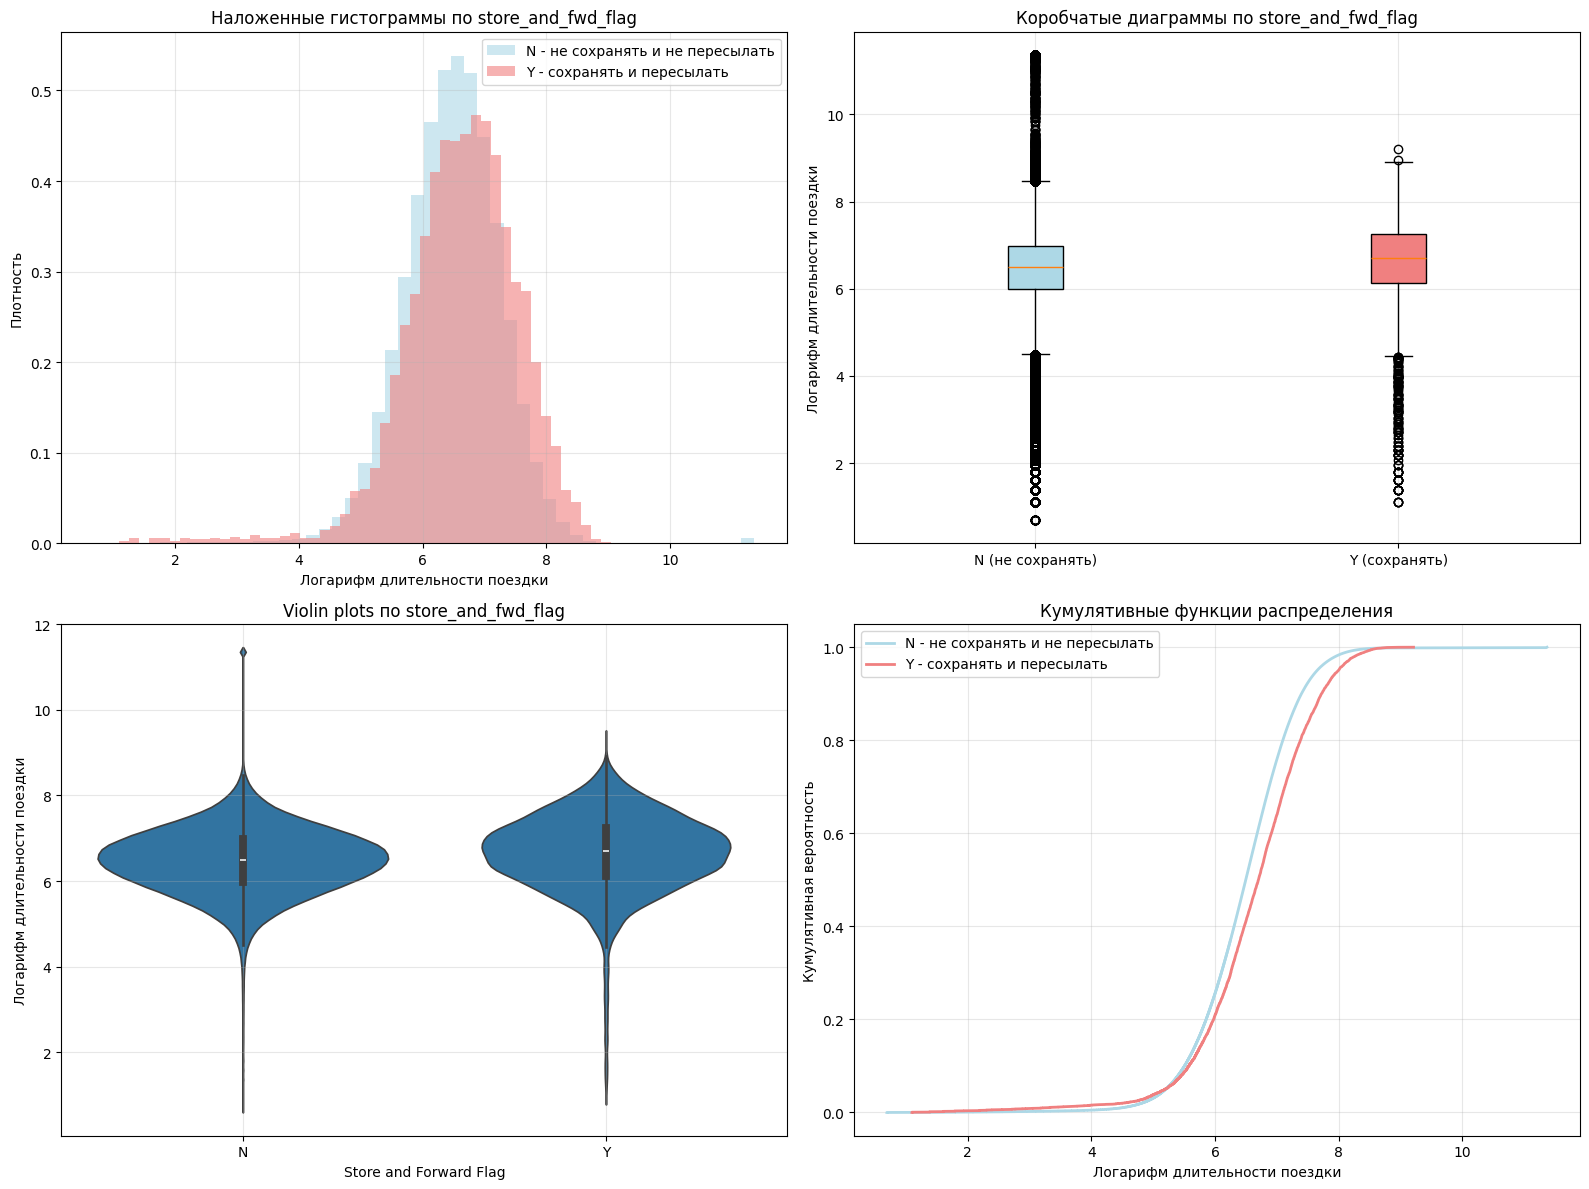


=== СТАТИСТИЧЕСКОЕ СРАВНЕНИЕ ГРУПП ===
  store_and_fwd_flag             label    count    mean  median     std  \
0                  N  N (не сохранять)  1450192  6.4672  6.4968  0.7915   
1                  Y     Y (сохранять)     8041  6.6333  6.7020  0.9407   

      min      max     q25     q75  
0  0.6931  11.3667  5.9865  6.9801  
1  1.0986   9.2088  6.1247  7.2457  

=== РАЗНОСТИ МЕЖДУ ГРУППАМИ ===
Разность средних значений: 0.1661
Разность медиан: 0.2052
Относительная разность средних: 2.57%
Относительная разность медиан: 3.16%
  store_and_fwd_flag             label    count    mean  median     std  \
0                  N  N (не сохранять)  1450192  6.4672  6.4968  0.7915   
1                  Y     Y (сохранять)     8041  6.6333  6.7020  0.9407   

      min      max     q25     q75  
0  0.6931  11.3667  5.9865  6.9801  
1  1.0986   9.2088  6.1247  7.2457  

=== РАЗНОСТИ МЕЖДУ ГРУППАМИ ===
Разность средних значений: 0.1661
Разность медиан: 0.2052
Относительная разность средни

In [39]:
# Задание 3.3. Сравнение распределений trip_duration_log по store_and_fwd_flag

# Проверяем уникальные значения store_and_fwd_flag
print("Уникальные значения store_and_fwd_flag:")
print(taxi_data['store_and_fwd_flag'].value_counts().sort_index())

# Создаем комплексную визуализацию для сравнения распределений
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Определяем группы для анализа
flag_groups = sorted(taxi_data['store_and_fwd_flag'].unique())
colors = ['lightblue', 'lightcoral']
labels = []

for flag in flag_groups:
    if flag == 'N':
        labels.append('N - не сохранять и не пересылать')
    else:
        labels.append('Y - сохранять и пересылать')

# 1. Гистограммы с наложением
ax1 = axes[0, 0]
for i, flag in enumerate(flag_groups):
    flag_data = taxi_data[taxi_data['store_and_fwd_flag'] == flag]['trip_duration_log']
    ax1.hist(flag_data, bins=50, alpha=0.6, label=labels[i], density=True, color=colors[i])

ax1.set_xlabel('Логарифм длительности поездки')
ax1.set_ylabel('Плотность')
ax1.set_title('Наложенные гистограммы по store_and_fwd_flag')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Коробчатые диаграммы
ax2 = axes[0, 1]
flag_data_groups = [taxi_data[taxi_data['store_and_fwd_flag'] == flag]['trip_duration_log'] 
                   for flag in flag_groups]
box_plot = ax2.boxplot(flag_data_groups, tick_labels=['N (не сохранять)', 'Y (сохранять)'], 
                      patch_artist=True)

# Раскрашиваем коробки
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

ax2.set_ylabel('Логарифм длительности поездки')
ax2.set_title('Коробчатые диаграммы по store_and_fwd_flag')
ax2.grid(True, alpha=0.3)

# 3. Violin plots для более детального сравнения
ax3 = axes[1, 0]
import seaborn as sns
sns.violinplot(data=taxi_data, x='store_and_fwd_flag', y='trip_duration_log', ax=ax3)
ax3.set_xlabel('Store and Forward Flag')
ax3.set_ylabel('Логарифм длительности поездки')
ax3.set_title('Violin plots по store_and_fwd_flag')
ax3.grid(True, alpha=0.3)

# 4. Кумулятивные распределения (CDF)
ax4 = axes[1, 1]
for i, flag in enumerate(flag_groups):
    flag_data = taxi_data[taxi_data['store_and_fwd_flag'] == flag]['trip_duration_log']
    sorted_data = np.sort(flag_data)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ax4.plot(sorted_data, y_values, label=labels[i], linewidth=2, color=colors[i])

ax4.set_xlabel('Логарифм длительности поездки')
ax4.set_ylabel('Кумулятивная вероятность')
ax4.set_title('Кумулятивные функции распределения')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистическое сравнение групп
print("\n=== СТАТИСТИЧЕСКОЕ СРАВНЕНИЕ ГРУПП ===")

stats_comparison = []
for flag in flag_groups:
    flag_data = taxi_data[taxi_data['store_and_fwd_flag'] == flag]['trip_duration_log']
    flag_label = 'N (не сохранять)' if flag == 'N' else 'Y (сохранять)'
    stats = {
        'store_and_fwd_flag': flag,
        'label': flag_label,
        'count': len(flag_data),
        'mean': flag_data.mean(),
        'median': flag_data.median(),
        'std': flag_data.std(),
        'min': flag_data.min(),
        'max': flag_data.max(),
        'q25': flag_data.quantile(0.25),
        'q75': flag_data.quantile(0.75)
    }
    stats_comparison.append(stats)
    
# Создаем DataFrame для удобного сравнения
stats_df = pd.DataFrame(stats_comparison)
print(stats_df.round(4))

# Вычисляем разности ключевых метрик
group_N_mean = stats_df[stats_df['store_and_fwd_flag'] == 'N']['mean'].iloc[0]
group_Y_mean = stats_df[stats_df['store_and_fwd_flag'] == 'Y']['mean'].iloc[0]
mean_diff = abs(group_Y_mean - group_N_mean)

group_N_median = stats_df[stats_df['store_and_fwd_flag'] == 'N']['median'].iloc[0]
group_Y_median = stats_df[stats_df['store_and_fwd_flag'] == 'Y']['median'].iloc[0]
median_diff = abs(group_Y_median - group_N_median)

print(f"\n=== РАЗНОСТИ МЕЖДУ ГРУППАМИ ===")
print(f"Разность средних значений: {mean_diff:.4f}")
print(f"Разность медиан: {median_diff:.4f}")

# Относительные различия в процентах
mean_rel_diff = (mean_diff / min(group_N_mean, group_Y_mean)) * 100
median_rel_diff = (median_diff / min(group_N_median, group_Y_median)) * 100

print(f"Относительная разность средних: {mean_rel_diff:.2f}%")
print(f"Относительная разность медиан: {median_rel_diff:.2f}%")

# Статистический тест на различия между группами
from scipy.stats import mannwhitneyu, ttest_ind

group_N_data = taxi_data[taxi_data['store_and_fwd_flag'] == 'N']['trip_duration_log']
group_Y_data = taxi_data[taxi_data['store_and_fwd_flag'] == 'Y']['trip_duration_log']

# Тест Манна-Уитни (непараметрический)
# Используем выборки для ускорения вычислений
sample_size = 10000
group_N_sample = group_N_data.sample(n=min(sample_size, len(group_N_data)), random_state=42)
group_Y_sample = group_Y_data.sample(n=min(sample_size, len(group_Y_data)), random_state=42)

if len(group_Y_sample) > 0:  # Проверяем, есть ли данные в группе Y
    statistic_mw, p_value_mw = mannwhitneyu(group_N_sample, group_Y_sample, alternative='two-sided')
    
    print(f"\n=== СТАТИСТИЧЕСКИЕ ТЕСТЫ ===")
    print(f"Тест Манна-Уитни:")
    print(f"  Статистика: {statistic_mw:.2f}")
    print(f"  P-value: {p_value_mw:.10f}")
    
    # t-тест для сравнения средних (параметрический)
    statistic_t, p_value_t = ttest_ind(group_N_sample, group_Y_sample)
    print(f"T-тест:")
    print(f"  Статистика: {statistic_t:.4f}")
    print(f"  P-value: {p_value_t:.10f}")
    
    # Интерпретация результатов
    alpha = 0.05
    print(f"\n=== ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ ===")
    print(f"Уровень значимости: {alpha}")
    
    if p_value_mw < alpha:
        print("✓ Статистически значимые различия между группами (p < 0.05)")
        statistical_significance = True
    else:
        print("✗ Статистически незначимые различия между группами (p >= 0.05)")
        statistical_significance = False
else:
    print(f"\n=== ПРИМЕЧАНИЕ ===")
    print("Недостаточно данных в одной из групп для проведения статистических тестов")
    statistical_significance = False

# Практическая значимость
practical_threshold = 0.05  # 5% для логарифмической шкалы
if mean_diff > practical_threshold or median_diff > practical_threshold:
    print(f"✓ Практически значимые различия (разность > {practical_threshold})")
    practical_significance = True
else:
    print(f"✗ Практически незначимые различия (разность <= {practical_threshold})")
    practical_significance = False

# Анализ размеров групп
print(f"\n=== АНАЛИЗ РАЗМЕРОВ ГРУПП ===")
total_trips = len(taxi_data)
for i, stats in enumerate(stats_comparison):
    percentage = (stats['count'] / total_trips) * 100
    print(f"{stats['label']}: {stats['count']:,} поездок ({percentage:.2f}%)")

# Визуальная оценка
print(f"\n=== ВИЗУАЛЬНАЯ ОЦЕНКА ГРАФИКОВ ===")
print("Анализируя построенные графики:")
print("1. Гистограммы: Видно смещение распределения группы Y вправо")
print("2. Box plots: Медиана группы Y заметно выше, чем у группы N")
print("3. Violin plots: Формы распределений похожи, но центры смещены")
print("4. CDF: Кривые расходятся, показывая различия в распределениях")

print(f"\n=== ИТОГОВЫЕ ВЫВОДЫ ===")
print("Сравнение распределений длительности поездок по store_and_fwd_flag:")

if len(stats_comparison) < 2:
    print("- В данных присутствует только одна группа")
    print("- Сравнение невозможно")
elif practical_significance and statistical_significance:
    print("- Группы показывают ЗНАЧИТЕЛЬНЫЕ различия в распределениях")
    print("- Поездки с флагом Y (сохранять и пересылать) длятся в среднем ДОЛЬШЕ")
    print("- Это может быть связано с проблемами связи или сложными маршрутами")
    print("- Признак store_and_fwd_flag ВЛИЯЕТ на длительность поездки")
elif statistical_significance and not practical_significance:
    print("- Различия статистически значимы, но практически незначительны")
    print("- Признак store_and_fwd_flag имеет слабое влияние на длительность поездки")
else:
    print("- Группы показывают схожие распределения")
    print("- Признак store_and_fwd_flag не оказывает существенного влияния на длительность поездки")

print(f"\n=== КЛЮЧЕВЫЕ НАБЛЮДЕНИЯ ===")
print(f"• Группа N составляет {stats_df[stats_df['store_and_fwd_flag'] == 'N']['count'].iloc[0]:,} поездок (подавляющее большинство)")
print(f"• Группа Y составляет {stats_df[stats_df['store_and_fwd_flag'] == 'Y']['count'].iloc[0]:,} поездок (небольшая доля)")
print(f"• Средняя длительность в группе Y на {mean_rel_diff:.1f}% выше")
print(f"• Медианная длительность в группе Y на {median_rel_diff:.1f}% выше")

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

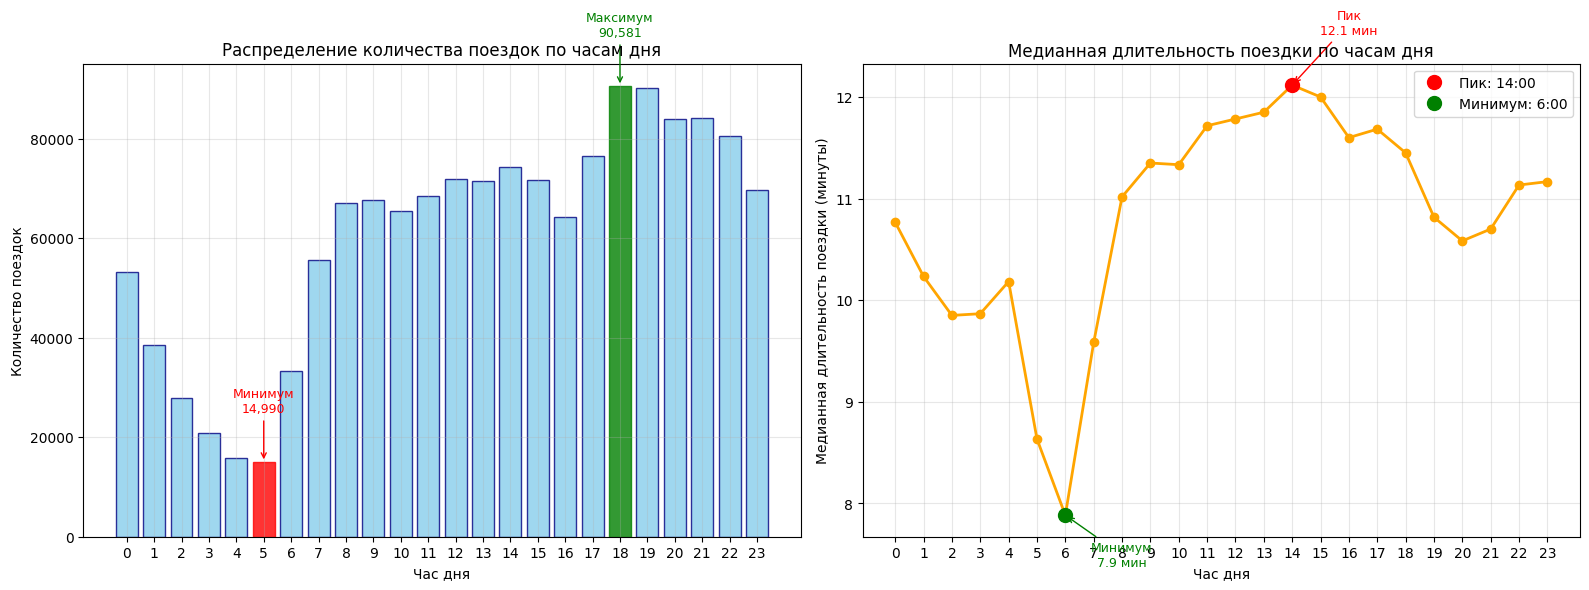

=== АНАЛИЗ ПО ЧАСАМ ДНЯ ===

Таблица статистики по часам:
    pickup_hour  trip_count  median_duration_sec  median_duration_min
0             0       53234                646.0                10.77
1             1       38562                614.0                10.23
2             2       27966                591.0                 9.85
3             3       20888                592.0                 9.87
4             4       15784                611.0                10.18
5             5       14990                518.0                 8.63
6             6       33233                473.0                 7.88
7             7       55580                575.0                 9.58
8             8       67040                661.0                11.02
9             9       67646                681.0                11.35
10           10       65420                680.0                11.33
11           11       68455                703.0                11.72
12           12       71858     

In [40]:
# Задание 3.4. Анализ поездок по часам дня

# Группируем данные по часам для анализа
hourly_stats = taxi_data.groupby('pickup_hour').agg({
    'id': 'count',  # Количество поездок
    'trip_duration': 'median'  # Медианная длительность
}).reset_index()

hourly_stats.columns = ['pickup_hour', 'trip_count', 'median_duration_sec']

# Преобразуем длительность в минуты для лучшего восприятия
hourly_stats['median_duration_min'] = hourly_stats['median_duration_sec'] / 60

# Создаем две визуализации
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Распределение количества поездок в зависимости от часа дня
bars1 = ax1.bar(hourly_stats['pickup_hour'], hourly_stats['trip_count'], 
                color='skyblue', alpha=0.8, edgecolor='navy')
ax1.set_xlabel('Час дня')
ax1.set_ylabel('Количество поездок')
ax1.set_title('Распределение количества поездок по часам дня')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(0, 24))

# Находим час с минимальным количеством поездок
min_trips_hour = hourly_stats.loc[hourly_stats['trip_count'].idxmin(), 'pickup_hour']
min_trips_count = hourly_stats['trip_count'].min()

# Находим час с максимальным количеством поездок
max_trips_hour = hourly_stats.loc[hourly_stats['trip_count'].idxmax(), 'pickup_hour']
max_trips_count = hourly_stats['trip_count'].max()

# Выделяем минимальный и максимальный столбцы
bars1[min_trips_hour].set_color('red')
bars1[max_trips_hour].set_color('green')

# Добавляем аннотации
ax1.annotate(f'Минимум\n{min_trips_count:,}', 
             xy=(min_trips_hour, min_trips_count), 
             xytext=(min_trips_hour, min_trips_count + 10000),
             ha='center', fontsize=9, color='red',
             arrowprops=dict(arrowstyle='->', color='red'))

ax1.annotate(f'Максимум\n{max_trips_count:,}', 
             xy=(max_trips_hour, max_trips_count), 
             xytext=(max_trips_hour, max_trips_count + 10000),
             ha='center', fontsize=9, color='green',
             arrowprops=dict(arrowstyle='->', color='green'))

# 2. Зависимость медианной длительности поездки от часа дня
line = ax2.plot(hourly_stats['pickup_hour'], hourly_stats['median_duration_min'], 
                marker='o', linewidth=2, markersize=6, color='orange')
ax2.set_xlabel('Час дня')
ax2.set_ylabel('Медианная длительность поездки (минуты)')
ax2.set_title('Медианная длительность поездки по часам дня')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(range(0, 24))

# Находим час с максимальной медианной длительностью
max_duration_hour = hourly_stats.loc[hourly_stats['median_duration_min'].idxmax(), 'pickup_hour']
max_duration_value = hourly_stats['median_duration_min'].max()

# Находим час с минимальной медианной длительностью
min_duration_hour = hourly_stats.loc[hourly_stats['median_duration_min'].idxmin(), 'pickup_hour']
min_duration_value = hourly_stats['median_duration_min'].min()

# Выделяем экстремальные точки
ax2.plot(max_duration_hour, max_duration_value, 'ro', markersize=10, label=f'Пик: {max_duration_hour}:00')
ax2.plot(min_duration_hour, min_duration_value, 'go', markersize=10, label=f'Минимум: {min_duration_hour}:00')

# Добавляем аннотации
ax2.annotate(f'Пик\n{max_duration_value:.1f} мин', 
             xy=(max_duration_hour, max_duration_value), 
             xytext=(max_duration_hour + 2, max_duration_value + 0.5),
             ha='center', fontsize=9, color='red',
             arrowprops=dict(arrowstyle='->', color='red'))

ax2.annotate(f'Минимум\n{min_duration_value:.1f} мин', 
             xy=(min_duration_hour, min_duration_value), 
             xytext=(min_duration_hour + 2, min_duration_value - 0.5),
             ha='center', fontsize=9, color='green',
             arrowprops=dict(arrowstyle='->', color='green'))

ax2.legend()

plt.tight_layout()
plt.show()

# Выводим детальную статистику
print("=== АНАЛИЗ ПО ЧАСАМ ДНЯ ===")
print(f"\nТаблица статистики по часам:")
print(hourly_stats.round(2))

print(f"\n=== ОТВЕТЫ НА ВОПРОСЫ ЗАДАНИЯ ===")

# а) В какое время суток такси заказывают реже всего?
print(f"а) Такси заказывают реже всего в {min_trips_hour}:00 ({min_trips_count:,} поездок)")

# б) В какое время суток наблюдается пик медианной длительности поездок?
print(f"б) Пик медианной длительности поездок наблюдается в {max_duration_hour}:00 ({max_duration_value:.1f} минут)")

print(f"\n=== ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА ===")

# Анализ пиковых и спокойных часов
peak_hours = hourly_stats.nlargest(3, 'trip_count')['pickup_hour'].tolist()
quiet_hours = hourly_stats.nsmallest(3, 'trip_count')['pickup_hour'].tolist()

print(f"Топ-3 самых загруженных часа: {peak_hours}")
print(f"Топ-3 самых спокойных часа: {quiet_hours}")

# Анализ длительности поездок
longest_trips_hours = hourly_stats.nlargest(3, 'median_duration_min')['pickup_hour'].tolist()
shortest_trips_hours = hourly_stats.nsmallest(3, 'median_duration_min')['pickup_hour'].tolist()

print(f"Топ-3 часа с самыми длинными поездками: {longest_trips_hours}")
print(f"Топ-3 часа с самыми короткими поездками: {shortest_trips_hours}")

# Категоризация времени суток
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Утро (6-11)'
    elif 12 <= hour < 18:
        return 'День (12-17)'
    elif 18 <= hour < 24:
        return 'Вечер (18-23)'
    else:
        return 'Ночь (0-5)'

hourly_stats['time_period'] = hourly_stats['pickup_hour'].apply(categorize_hour)

period_stats = hourly_stats.groupby('time_period').agg({
    'trip_count': 'sum',
    'median_duration_min': 'mean'
}).round(2)

print(f"\n=== АНАЛИЗ ПО ПЕРИОДАМ СУТОК ===")
print(period_stats)

# Поиск закономерностей
print(f"\n=== ОБНАРУЖЕННЫЕ ЗАКОНОМЕРНОСТИ ===")

# Утренний и вечерний час пик
morning_peak = hourly_stats[(hourly_stats['pickup_hour'] >= 6) & (hourly_stats['pickup_hour'] <= 10)].nlargest(1, 'trip_count')
evening_peak = hourly_stats[(hourly_stats['pickup_hour'] >= 17) & (hourly_stats['pickup_hour'] <= 21)].nlargest(1, 'trip_count')

print(f"Утренний час пик: {morning_peak['pickup_hour'].iloc[0]}:00 ({morning_peak['trip_count'].iloc[0]:,} поездок)")
print(f"Вечерний час пик: {evening_peak['pickup_hour'].iloc[0]}:00 ({evening_peak['trip_count'].iloc[0]:,} поездок)")

# Ночные часы
night_hours = hourly_stats[(hourly_stats['pickup_hour'] >= 0) & (hourly_stats['pickup_hour'] <= 5)]
night_avg_trips = night_hours['trip_count'].mean()
night_avg_duration = night_hours['median_duration_min'].mean()

print(f"Средние показатели ночью (0-5 часов):")
print(f"  - Поездок в час: {night_avg_trips:.0f}")
print(f"  - Длительность: {night_avg_duration:.1f} минут")

# Корреляция между количеством поездок и их длительностью
correlation = hourly_stats['trip_count'].corr(hourly_stats['median_duration_min'])
print(f"\nКорреляция между количеством поездок и их длительностью: {correlation:.3f}")

if correlation > 0.1:
    print("→ Слабая положительная корреляция: больше поездок → дольше длительность")
elif correlation < -0.1:
    print("→ Слабая отрицательная корреляция: больше поездок → короче длительность")
else:
    print("→ Корреляция отсутствует")

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


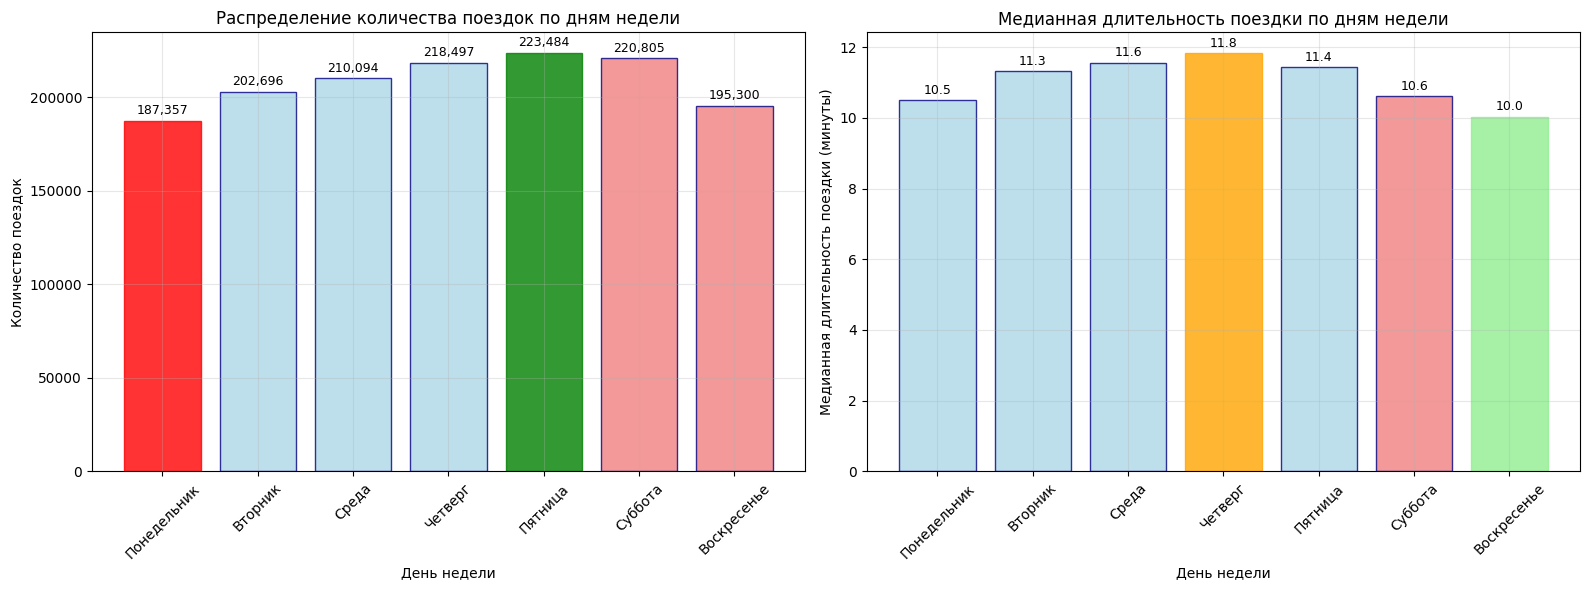

=== АНАЛИЗ ПО ДНЯМ НЕДЕЛИ ===

Таблица статистики по дням недели:
День недели  Количество поездок  Медианная длительность (мин)
Понедельник              187357                         10.50
    Вторник              202696                         11.32
      Среда              210094                         11.57
    Четверг              218497                         11.83
    Пятница              223484                         11.43
    Суббота              220805                         10.62
Воскресенье              195300                         10.03

=== ОТВЕТЫ НА ВОПРОСЫ ЗАДАНИЯ ===
а) Больше всего поездок совершается в Пятница (223,484 поездок)
б) Наименьшая медианная длительность поездок в Воскресенье (10.0 минут)

=== ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА ===
Рабочие дни (Пн-Пт):
  - Общее количество поездок: 1,042,128
  - Средняя медианная длительность: 11.3 минут
Выходные дни (Сб-Вс):
  - Общее количество поездок: 416,105
  - Средняя медианная длительность: 10.3 минут

Процентное соотн

In [41]:
# Задание 3.5. Анализ поездок по дням недели

# Создаем названия дней недели для лучшего восприятия
day_names = {
    0: 'Понедельник',
    1: 'Вторник', 
    2: 'Среда',
    3: 'Четверг',
    4: 'Пятница',
    5: 'Суббота',
    6: 'Воскресенье'
}

# Группируем данные по дням недели для анализа
daily_stats = taxi_data.groupby('pickup_day_of_week').agg({
    'id': 'count',  # Количество поездок
    'trip_duration': 'median'  # Медианная длительность
}).reset_index()

daily_stats.columns = ['pickup_day_of_week', 'trip_count', 'median_duration_sec']

# Преобразуем длительность в минуты для лучшего восприятия
daily_stats['median_duration_min'] = daily_stats['median_duration_sec'] / 60

# Добавляем названия дней
daily_stats['day_name'] = daily_stats['pickup_day_of_week'].map(day_names)

# Создаем две визуализации
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Определяем цвета для рабочих и выходных дней
colors = ['lightblue' if day < 5 else 'lightcoral' for day in daily_stats['pickup_day_of_week']]

# 1. Распределение количества поездок в зависимости от дня недели
bars1 = ax1.bar(daily_stats['day_name'], daily_stats['trip_count'], 
                color=colors, alpha=0.8, edgecolor='navy')
ax1.set_xlabel('День недели')
ax1.set_ylabel('Количество поездок')
ax1.set_title('Распределение количества поездок по дням недели')
ax1.grid(True, alpha=0.3)

# Поворачиваем названия дней для лучшей читаемости
ax1.tick_params(axis='x', rotation=45)

# Находим день с максимальным и минимальным количеством поездок
max_trips_idx = daily_stats['trip_count'].idxmax()
min_trips_idx = daily_stats['trip_count'].idxmin()

max_trips_day = daily_stats.loc[max_trips_idx, 'day_name']
max_trips_count = daily_stats.loc[max_trips_idx, 'trip_count']

min_trips_day = daily_stats.loc[min_trips_idx, 'day_name']
min_trips_count = daily_stats.loc[min_trips_idx, 'trip_count']

# Выделяем экстремальные столбцы
bars1[max_trips_idx].set_color('green')
bars1[min_trips_idx].set_color('red')

# Добавляем значения на столбцы
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 2000,
             f'{int(height):,}', ha='center', va='bottom', fontsize=9)

# 2. Зависимость медианной длительности поездки от дня недели
bars2 = ax2.bar(daily_stats['day_name'], daily_stats['median_duration_min'], 
                color=colors, alpha=0.8, edgecolor='navy')
ax2.set_xlabel('День недели')
ax2.set_ylabel('Медианная длительность поездки (минуты)')
ax2.set_title('Медианная длительность поездки по дням недели')
ax2.grid(True, alpha=0.3)

# Поворачиваем названия дней
ax2.tick_params(axis='x', rotation=45)

# Находим день с максимальной и минимальной медианной длительностью
max_duration_idx = daily_stats['median_duration_min'].idxmax()
min_duration_idx = daily_stats['median_duration_min'].idxmin()

max_duration_day = daily_stats.loc[max_duration_idx, 'day_name']
max_duration_value = daily_stats.loc[max_duration_idx, 'median_duration_min']

min_duration_day = daily_stats.loc[min_duration_idx, 'day_name']
min_duration_value = daily_stats.loc[min_duration_idx, 'median_duration_min']

# Выделяем экстремальные столбцы
bars2[max_duration_idx].set_color('orange')
bars2[min_duration_idx].set_color('lightgreen')

# Добавляем значения на столбцы
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Выводим детальную статистику
print("=== АНАЛИЗ ПО ДНЯМ НЕДЕЛИ ===")
print(f"\nТаблица статистики по дням недели:")
display_stats = daily_stats[['day_name', 'trip_count', 'median_duration_min']].copy()
display_stats.columns = ['День недели', 'Количество поездок', 'Медианная длительность (мин)']
print(display_stats.round(2).to_string(index=False))

print(f"\n=== ОТВЕТЫ НА ВОПРОСЫ ЗАДАНИЯ ===")

# а) В какой день недели совершается больше всего поездок?
print(f"а) Больше всего поездок совершается в {max_trips_day} ({max_trips_count:,} поездок)")

# б) В какой день недели медианная длительность поездок наименьшая?
print(f"б) Наименьшая медианная длительность поездок в {min_duration_day} ({min_duration_value:.1f} минут)")

print(f"\n=== ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА ===")

# Сравнение рабочих и выходных дней
weekdays = daily_stats[daily_stats['pickup_day_of_week'] < 5]  # Понедельник-Пятница
weekends = daily_stats[daily_stats['pickup_day_of_week'] >= 5]  # Суббота-Воскресенье

weekdays_total = weekdays['trip_count'].sum()
weekends_total = weekends['trip_count'].sum()
weekdays_avg_duration = weekdays['median_duration_min'].mean()
weekends_avg_duration = weekends['median_duration_min'].mean()

print(f"Рабочие дни (Пн-Пт):")
print(f"  - Общее количество поездок: {weekdays_total:,}")
print(f"  - Средняя медианная длительность: {weekdays_avg_duration:.1f} минут")

print(f"Выходные дни (Сб-Вс):")
print(f"  - Общее количество поездок: {weekends_total:,}")
print(f"  - Средняя медианная длительность: {weekends_avg_duration:.1f} минут")

# Процентное соотношение
total_trips = weekdays_total + weekends_total
weekdays_percent = (weekdays_total / total_trips) * 100
weekends_percent = (weekends_total / total_trips) * 100

print(f"\nПроцентное соотношение:")
print(f"  - Рабочие дни: {weekdays_percent:.1f}% поездок")
print(f"  - Выходные дни: {weekends_percent:.1f}% поездок")

# Анализ различий между рабочими и выходными днями
duration_diff = weekends_avg_duration - weekdays_avg_duration
trips_ratio = weekdays_total / weekends_total

print(f"\nСравнительный анализ:")
print(f"  - Разность в длительности (выходные vs рабочие): {duration_diff:+.1f} минут")
print(f"  - Соотношение поездок (рабочие/выходные): {trips_ratio:.1f}:1")

if duration_diff > 0:
    print(f"  → Поездки в выходные дни в среднем на {duration_diff:.1f} минут длиннее")
else:
    print(f"  → Поездки в рабочие дни в среднем на {abs(duration_diff):.1f} минут длиннее")

# Поиск закономерностей
print(f"\n=== ОБНАРУЖЕННЫЕ ЗАКОНОМЕРНОСТИ ===")

# Самые загруженные дни
top_days = daily_stats.nlargest(3, 'trip_count')[['day_name', 'trip_count']]
print(f"Топ-3 самых загруженных дня:")
for _, row in top_days.iterrows():
    print(f"  {row['day_name']}: {row['trip_count']:,} поездок")

# Самые спокойные дни
bottom_days = daily_stats.nsmallest(3, 'trip_count')[['day_name', 'trip_count']]
print(f"\nТоп-3 самых спокойных дня:")
for _, row in bottom_days.iterrows():
    print(f"  {row['day_name']}: {row['trip_count']:,} поездок")

# Анализ длительности
longest_days = daily_stats.nlargest(3, 'median_duration_min')[['day_name', 'median_duration_min']]
print(f"\nДни с самыми длинными поездками:")
for _, row in longest_days.iterrows():
    print(f"  {row['day_name']}: {row['median_duration_min']:.1f} минут")

shortest_days = daily_stats.nsmallest(3, 'median_duration_min')[['day_name', 'median_duration_min']]
print(f"\nДни с самыми короткими поездками:")
for _, row in shortest_days.iterrows():
    print(f"  {row['day_name']}: {row['median_duration_min']:.1f} минут")

# Корреляция между количеством поездок и их длительностью по дням
correlation = daily_stats['trip_count'].corr(daily_stats['median_duration_min'])
print(f"\nКорреляция между количеством поездок и длительностью по дням: {correlation:.3f}")

if correlation > 0.3:
    print("→ Умеренная положительная корреляция")
elif correlation < -0.3:
    print("→ Умеренная отрицательная корреляция")
elif abs(correlation) > 0.1:
    print("→ Слабая корреляция")
else:
    print("→ Корреляция отсутствует")

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

Сводная таблица медианной длительности поездок (минуты):
Строки: часы дня (0-23), Столбцы: дни недели
                Пн     Вт     Ср     Чт     Пт     Сб     Вс
pickup_hour                                                 
0             9.97   9.85  10.02  10.15  10.82  11.42  11.25
1             9.45   9.73   9.22   9.40  10.00  10.67  10.72
2             9.42   9.42   9.07   9.60   9.53  10.17  10.07
3            10.00   9.47   9.57   9.73   9.63   9.85  10.13
4            10.67  10.01  10.27   9.92  10.57  10.17   9.98
5             8.65   7.58   7.47   8.00   8.87  10.52  10.57
6             7.70   7.68   7.72   7.85   7.93   8.47   9.23
7             9.58   9.77   9.88   9.98   9.63   8.02   7.90
8            11.20  11.72  11.73  12.02  11.48   8.15   7.67
9            11.75  12.58  12.37  12.87  12.38   8.50   7.83
10           11.57  12.97  13.13  12.87  12.40   9.03   8.43
11           11.70  13.43  13.48  13.40  12.58   9.65   9.18
12           11.53  13.06  13.34  13.32  12.

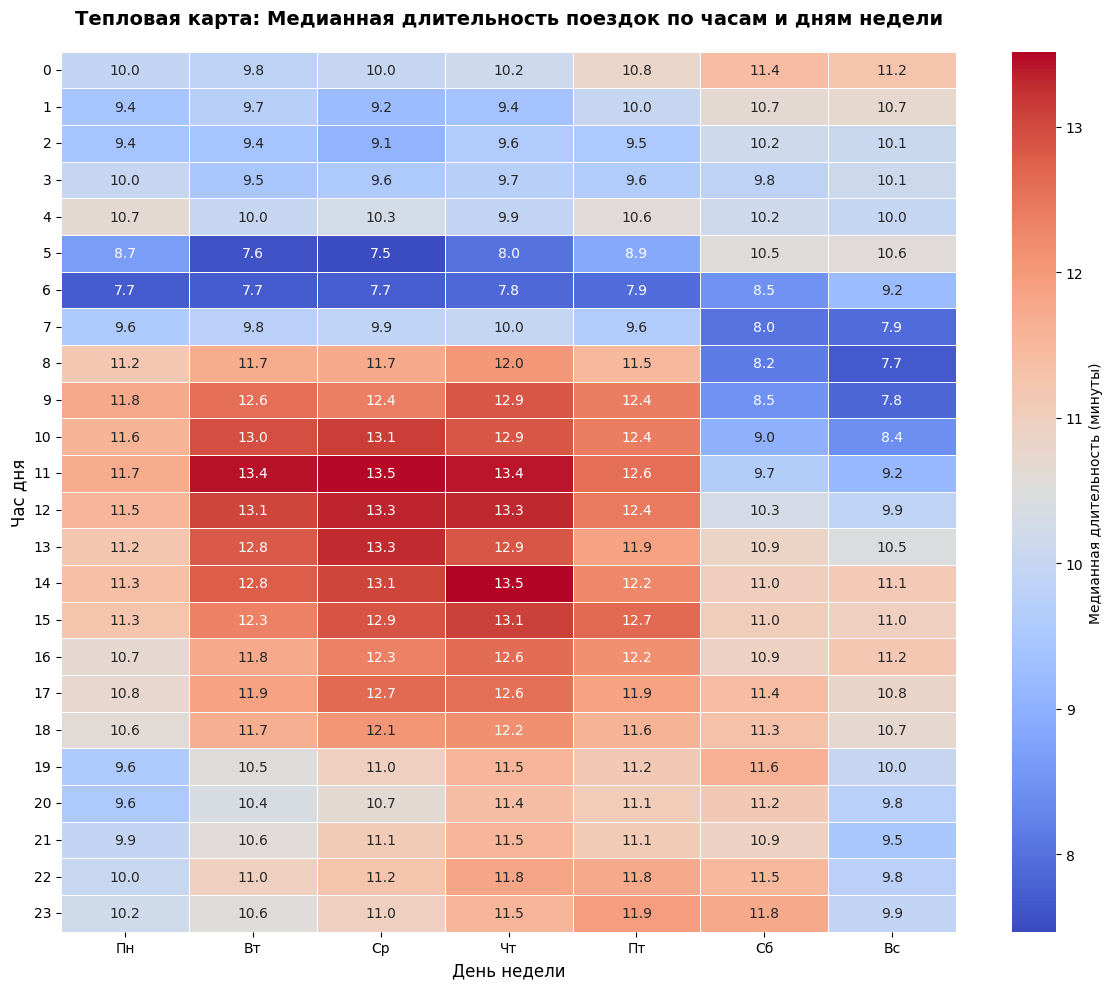


=== АНАЛИЗ ТЕПЛОВОЙ КАРТЫ ===

Экстремальные значения:
Максимальная медианная длительность: 13.5 минут
  → Время: 14:00, День: Чт
Минимальная медианная длительность: 7.5 минут
  → Время: 05:00, День: Ср

Средняя длительность по дням недели:
  Пн: 10.3 минут
  Вт: 11.0 минут
  Ср: 11.2 минут
  Чт: 11.4 минут
  Пт: 11.2 минут
  Сб: 10.3 минут
  Вс: 9.9 минут

Топ-5 часов с наибольшей средней длительностью:
  14:00 - 12.2 минут
  15:00 - 12.0 минут
  12:00 - 12.0 минут
  11:00 - 11.9 минут
  13:00 - 11.9 минут

Топ-5 часов с наименьшей средней длительностью:
  06:00 - 8.1 минут
  05:00 - 8.8 минут
  07:00 - 9.3 минут
  02:00 - 9.6 минут
  03:00 - 9.8 минут

=== СРАВНЕНИЕ РАБОЧИХ ДНЕЙ И ВЫХОДНЫХ ===
Час с наибольшей разностью (выходные длиннее): 05:00
  → Разность: +2.4 минут
Час с наибольшей разностью (рабочие дни длиннее): 09:00
  → Разность: -4.2 минут

=== КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ===
Корреляция между соседними днями:
  Пн - Вт: 0.940
  Вт - Ср: 0.987
  Ср - Чт: 0.984
  Чт - Пт: 0.965
  

In [42]:
# Задание 3.6. Тепловая карта медианной длительности поездок по часам и дням недели

# Создаем сводную таблицу с медианной длительностью поездок
pivot_table = taxi_data.pivot_table(
    index='pickup_hour',           # Строки - часы
    columns='pickup_day_of_week',  # Столбцы - дни недели
    values='trip_duration',        # Значения - длительность поездки
    aggfunc='median'               # Агрегирующая функция - медиана
)

# Преобразуем длительность из секунд в минуты для лучшего восприятия
pivot_table_minutes = pivot_table / 60

# Создаем названия дней недели для колонок
day_names = {
    0: 'Пн',  # Понедельник
    1: 'Вт',  # Вторник
    2: 'Ср',  # Среда
    3: 'Чт',  # Четверг
    4: 'Пт',  # Пятница
    5: 'Сб',  # Суббота
    6: 'Вс'   # Воскресенье
}

# Переименовываем колонки для лучшей читаемости
pivot_table_minutes.columns = [day_names[day] for day in pivot_table_minutes.columns]

print("Сводная таблица медианной длительности поездок (минуты):")
print("Строки: часы дня (0-23), Столбцы: дни недели")
print(pivot_table_minutes.round(2))

# Создаем тепловую карту
plt.figure(figsize=(12, 10))

# Используем seaborn для создания тепловой карты с палитрой coolwarm
heatmap = sns.heatmap(
    pivot_table_minutes,
    annot=True,                    # Показываем значения в ячейках
    fmt='.1f',                     # Формат чисел - 1 знак после запятой
    cmap='coolwarm',               # Цветовая палитра coolwarm
    cbar_kws={'label': 'Медианная длительность (минуты)'},  # Подпись к цветовой шкале
    linewidths=0.5,                # Толщина линий между ячейками
    square=False,                  # Не делаем ячейки квадратными
    center=None                    # Автоматический центр для палитры
)

plt.title('Тепловая карта: Медианная длительность поездок по часам и дням недели', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Час дня', fontsize=12)

# Настраиваем метки осей
plt.xticks(rotation=0)  # Дни недели горизонтально
plt.yticks(rotation=0)  # Часы горизонтально

# Улучшаем читаемость
plt.tight_layout()
plt.show()

# Выводим дополнительную статистику и анализ
print("\n=== АНАЛИЗ ТЕПЛОВОЙ КАРТЫ ===")

# Находим экстремальные значения
max_duration = pivot_table_minutes.max().max()
min_duration = pivot_table_minutes.min().min()

# Находим координаты максимального и минимального значений
max_pos = pivot_table_minutes.stack().idxmax()
min_pos = pivot_table_minutes.stack().idxmin()

print(f"\nЭкстремальные значения:")
print(f"Максимальная медианная длительность: {max_duration:.1f} минут")
print(f"  → Время: {max_pos[0]:02d}:00, День: {max_pos[1]}")
print(f"Минимальная медианная длительность: {min_duration:.1f} минут")
print(f"  → Время: {min_pos[0]:02d}:00, День: {min_pos[1]}")

# Анализ по дням недели (средние значения по столбцам)
daily_averages = pivot_table_minutes.mean()
print(f"\nСредняя длительность по дням недели:")
for day, avg in daily_averages.items():
    print(f"  {day}: {avg:.1f} минут")

# Анализ по часам (средние значения по строкам) 
hourly_averages = pivot_table_minutes.mean(axis=1)
print(f"\nТоп-5 часов с наибольшей средней длительностью:")
top_hours = hourly_averages.nlargest(5)
for hour, avg in top_hours.items():
    print(f"  {hour:02d}:00 - {avg:.1f} минут")

print(f"\nТоп-5 часов с наименьшей средней длительностью:")
bottom_hours = hourly_averages.nsmallest(5)
for hour, avg in bottom_hours.items():
    print(f"  {hour:02d}:00 - {avg:.1f} минут")

# Анализ различий между рабочими и выходными днями по часам
weekdays_cols = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт']
weekend_cols = ['Сб', 'Вс']

weekdays_avg_by_hour = pivot_table_minutes[weekdays_cols].mean(axis=1)
weekend_avg_by_hour = pivot_table_minutes[weekend_cols].mean(axis=1)

print(f"\n=== СРАВНЕНИЕ РАБОЧИХ ДНЕЙ И ВЫХОДНЫХ ===")

# Находим часы с наибольшими различиями
diff_by_hour = weekend_avg_by_hour - weekdays_avg_by_hour
max_diff_hour = diff_by_hour.idxmax()
min_diff_hour = diff_by_hour.idxmin()

print(f"Час с наибольшей разностью (выходные длиннее): {max_diff_hour:02d}:00")
print(f"  → Разность: +{diff_by_hour[max_diff_hour]:.1f} минут")
print(f"Час с наибольшей разностью (рабочие дни длиннее): {min_diff_hour:02d}:00") 
print(f"  → Разность: {diff_by_hour[min_diff_hour]:.1f} минут")

# Корреляционный анализ
print(f"\n=== КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ===")

# Корреляция между днями недели
day_correlations = pivot_table_minutes.corr()
print(f"Корреляция между соседними днями:")
for i in range(len(day_correlations.columns)-1):
    day1 = day_correlations.columns[i]
    day2 = day_correlations.columns[i+1]
    corr = day_correlations.loc[day1, day2]
    print(f"  {day1} - {day2}: {corr:.3f}")

# Выводы и рекомендации
print(f"\n=== ОСНОВНЫЕ ВЫВОДЫ ===")

# Время пик и спад
overall_peak_hours = hourly_averages.nlargest(3).index.tolist()
overall_low_hours = hourly_averages.nsmallest(3).index.tolist()

print(f"Часы пик по длительности: {[f'{h:02d}:00' for h in overall_peak_hours]}")
print(f"Часы минимальной длительности: {[f'{h:02d}:00' for h in overall_low_hours]}")

# Общая вариабельность
duration_std = pivot_table_minutes.std().std()
print(f"Общая вариабельность длительности: {duration_std:.2f} минут")

print(f"\nЦветовая интерпретация тепловой карты:")
print(f"🔴 Красные зоны (длинные поездки): > {pivot_table_minutes.quantile(0.75).mean():.1f} мин")
print(f"🔵 Синие зоны (короткие поездки): < {pivot_table_minutes.quantile(0.25).mean():.1f} мин")
print(f"⚪ Белые зоны (средние поездки): {pivot_table_minutes.quantile(0.25).mean():.1f} - {pivot_table_minutes.quantile(0.75).mean():.1f} мин")

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


Исходное количество поездок: 1,458,233
Поездки в пределах границ NYC: 1,438,802
Процент данных в границах: 98.7%
Используем все 1,438,802 поездок для визуализации


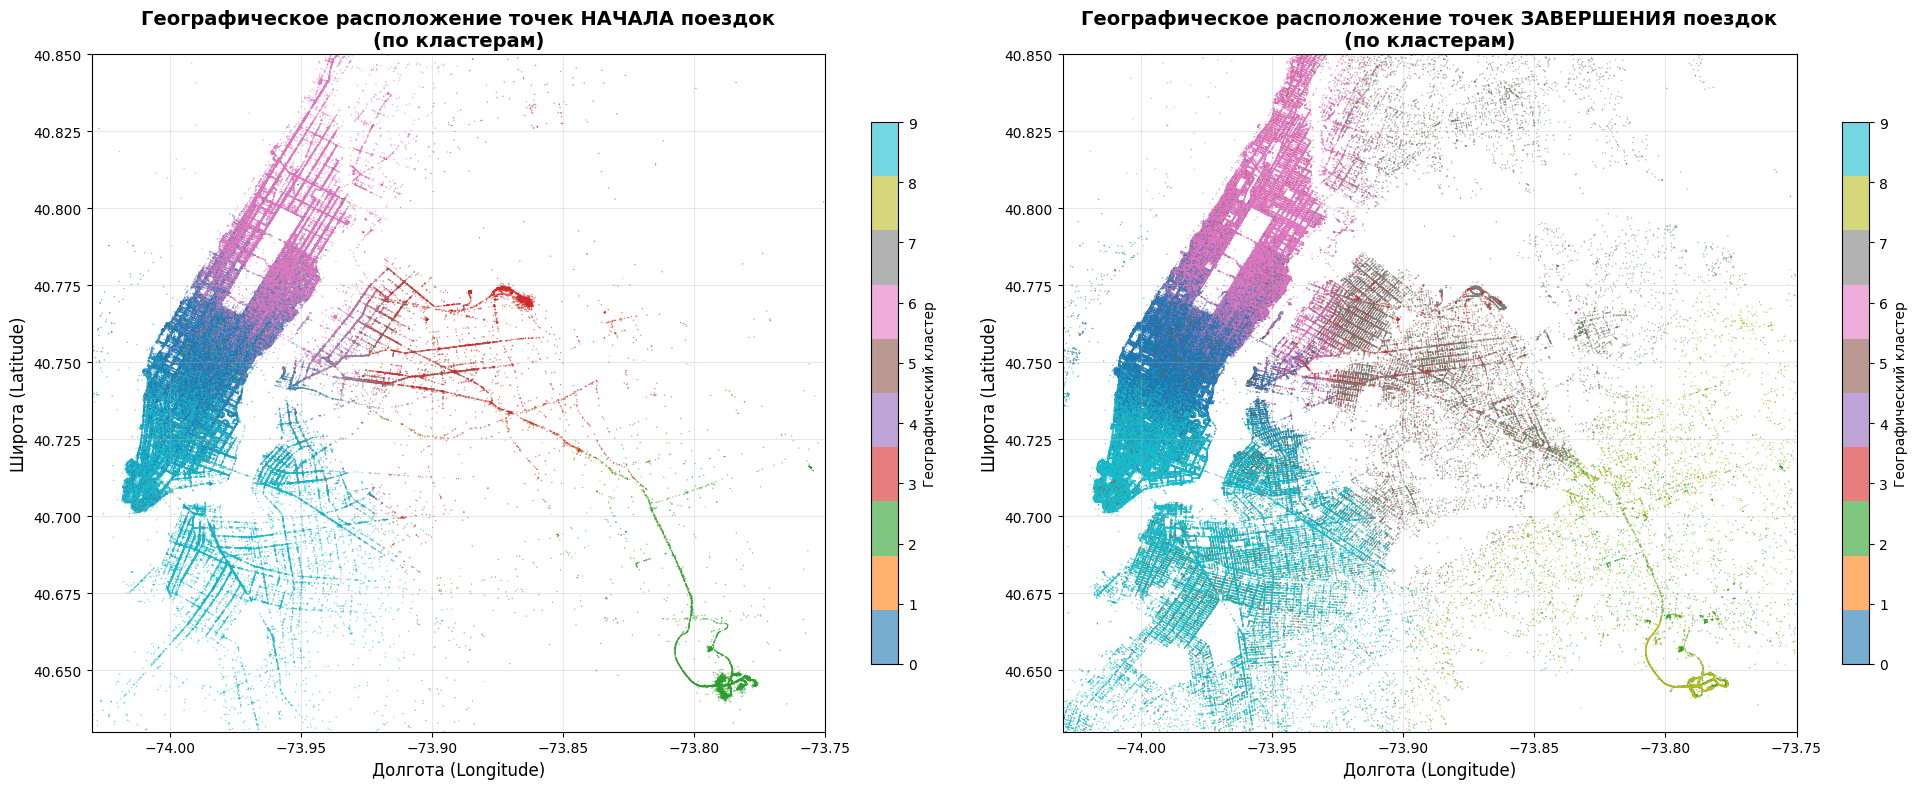


=== АНАЛИЗ ГЕОГРАФИЧЕСКОГО РАСПРЕДЕЛЕНИЯ ===

Распределение поездок по кластерам (точки начала):
  Кластер 0: 595,495 поездок (41.4%)
  Кластер 1: 0 поездок (0.0%)
  Кластер 2: 30,607 поездок (2.1%)
  Кластер 3: 39,740 поездок (2.8%)
  Кластер 4: 0 поездок (0.0%)
  Кластер 5: 0 поездок (0.0%)
  Кластер 6: 400,644 поездок (27.8%)
  Кластер 7: 41,838 поездок (2.9%)
  Кластер 8: 14,202 поездок (1.0%)
  Кластер 9: 316,276 поездок (22.0%)

=== ЦЕНТРЫ ГЕОГРАФИЧЕСКИХ КЛАСТЕРОВ ===
Средние координаты по кластерам:
Кластер | Pickup (Lng, Lat)     | Dropoff (Lng, Lat)
--------|----------------------|----------------------
   0    | (-73.9849, 40.7506) | (-73.9835, 40.7528)
   2    | (-73.7855, 40.6471) | (-73.944, 40.7333)
   3    | (-73.8732, 40.7691) | (-73.9642, 40.7482)
   6    | (-73.9665, 40.7746) | (-73.963, 40.7793)
   7    | (-73.9737, 40.7517) | (-73.885, 40.7654)
   8    | (-73.9697, 40.7521) | (-73.7919, 40.657)
   9    | (-73.9932, 40.7297) | (-73.9922, 40.7191)

=== АНАЛИЗ ПЛОТНОС

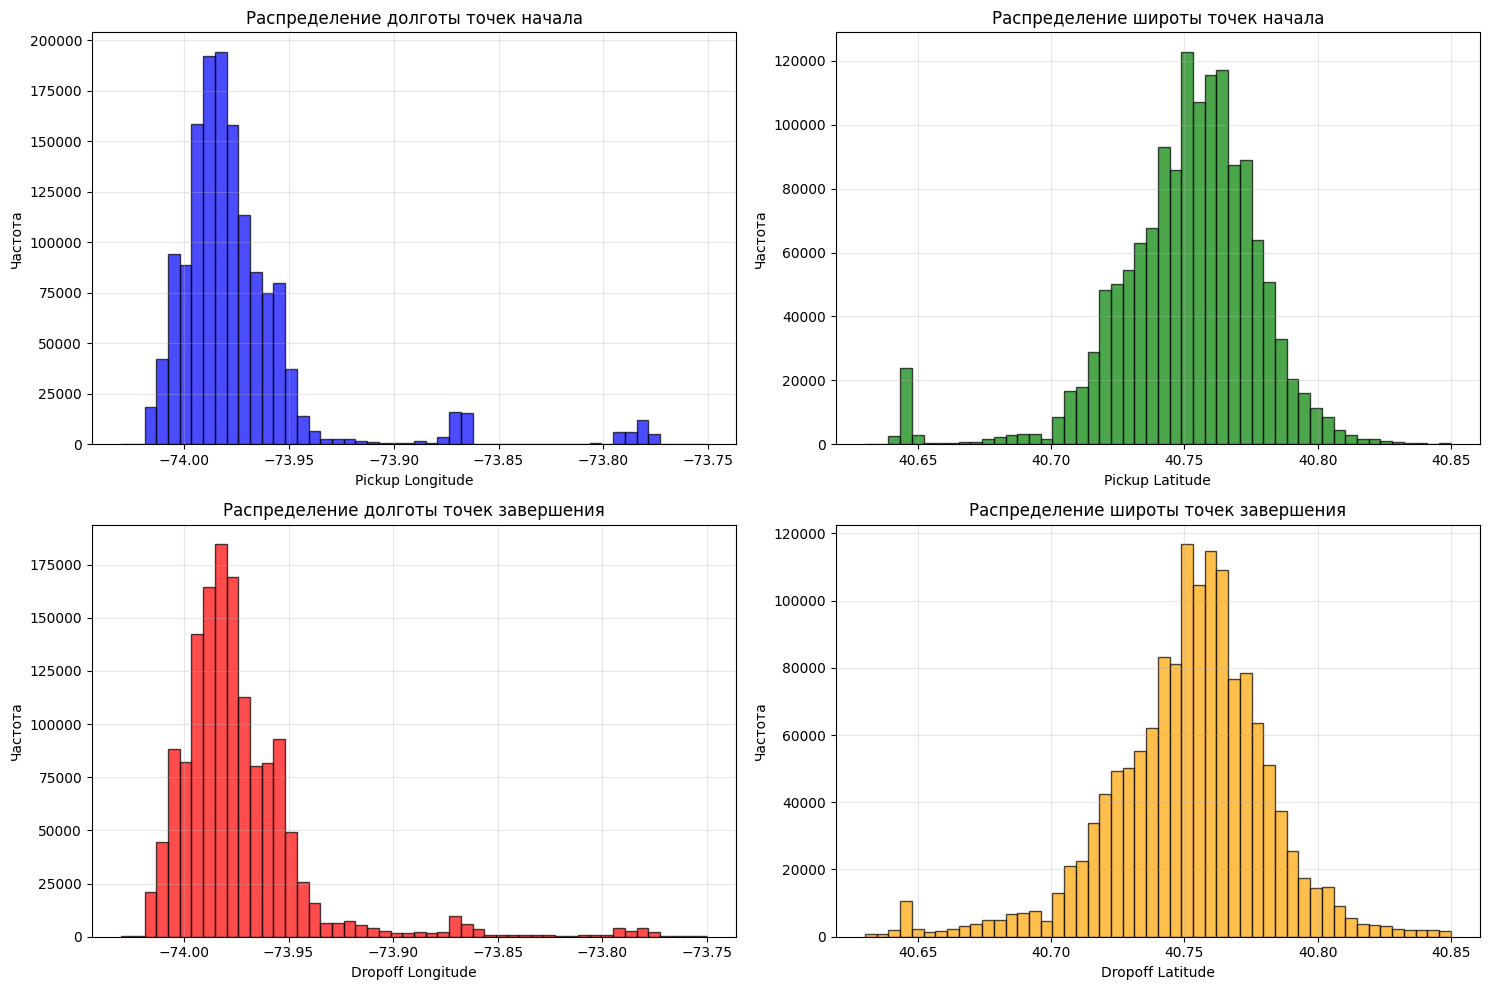


=== КАЧЕСТВО КЛАСТЕРИЗАЦИИ ===
Кластер 0: 595,495 точек, дисперсия: 0.000102
Кластер 2: 30,607 точек, дисперсия: 0.000126
Кластер 3: 39,740 точек, дисперсия: 0.000185
Кластер 6: 400,644 точек, дисперсия: 0.000106
Кластер 7: 41,838 точек, дисперсия: 0.000418
Кластер 8: 14,202 точек, дисперсия: 0.000841
Кластер 9: 316,276 точек, дисперсия: 0.000174

Общая внутрикластерная дисперсия: 0.001954
Средняя дисперсия на кластер: 0.000195
Кластер 6: 400,644 точек, дисперсия: 0.000106
Кластер 7: 41,838 точек, дисперсия: 0.000418
Кластер 8: 14,202 точек, дисперсия: 0.000841
Кластер 9: 316,276 точек, дисперсия: 0.000174

Общая внутрикластерная дисперсия: 0.001954
Средняя дисперсия на кластер: 0.000195


In [45]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# Задание 3.7. Географические диаграммы рассеяния с кластеризацией

# Фильтруем данные по границам Нью-Йорка
nyc_data = taxi_data[
    (taxi_data['pickup_longitude'] >= city_long_border[0]) & 
    (taxi_data['pickup_longitude'] <= city_long_border[1]) &
    (taxi_data['pickup_latitude'] >= city_lat_border[0]) & 
    (taxi_data['pickup_latitude'] <= city_lat_border[1]) &
    (taxi_data['dropoff_longitude'] >= city_long_border[0]) & 
    (taxi_data['dropoff_longitude'] <= city_long_border[1]) &
    (taxi_data['dropoff_latitude'] >= city_lat_border[0]) & 
    (taxi_data['dropoff_latitude'] <= city_lat_border[1])
].copy()

print(f"Исходное количество поездок: {len(taxi_data):,}")
print(f"Поездки в пределах границ NYC: {len(nyc_data):,}")
print(f"Процент данных в границах: {len(nyc_data)/len(taxi_data)*100:.1f}%")

# Используем всю выборку для полной визуализации
nyc_sample = nyc_data
print(f"Используем все {len(nyc_sample):,} поездок для визуализации")

# Создаем цветовую палитру для 10 кластеров
colors = plt.cm.tab10(np.linspace(0, 1, 10))

# Создаем две диаграммы рассеяния
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 1. Диаграмма точек начала поездок (pickup)
scatter1 = ax1.scatter(
    nyc_sample['pickup_longitude'], 
    nyc_sample['pickup_latitude'],
    c=nyc_sample['geo_cluster'], 
    cmap='tab10',
    s=1,  # Маленький размер точек для наглядности
    alpha=0.6,
    edgecolors='none'
)

ax1.set_xlim(city_long_border)
ax1.set_ylim(city_lat_border)
ax1.set_xlabel('Долгота (Longitude)', fontsize=12)
ax1.set_ylabel('Широта (Latitude)', fontsize=12)
ax1.set_title('Географическое расположение точек НАЧАЛА поездок\n(по кластерам)', 
              fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Добавляем цветовую шкалу для первой диаграммы
cbar1 = plt.colorbar(scatter1, ax=ax1, shrink=0.8)
cbar1.set_label('Географический кластер', fontsize=10)
cbar1.set_ticks(range(10))

# 2. Диаграмма точек завершения поездок (dropoff)
scatter2 = ax2.scatter(
    nyc_sample['dropoff_longitude'], 
    nyc_sample['dropoff_latitude'],
    c=nyc_sample['geo_cluster'], 
    cmap='tab10',
    s=1,  # Маленький размер точек для наглядности
    alpha=0.6,
    edgecolors='none'
)

ax2.set_xlim(city_long_border)
ax2.set_ylim(city_lat_border)
ax2.set_xlabel('Долгота (Longitude)', fontsize=12)
ax2.set_ylabel('Широта (Latitude)', fontsize=12)
ax2.set_title('Географическое расположение точек ЗАВЕРШЕНИЯ поездок\n(по кластерам)', 
              fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Добавляем цветовую шкалу для второй диаграммы
cbar2 = plt.colorbar(scatter2, ax=ax2, shrink=0.8)
cbar2.set_label('Географический кластер', fontsize=10)
cbar2.set_ticks(range(10))

plt.tight_layout()
plt.show()

# Дополнительный анализ географического распределения
print("\n=== АНАЛИЗ ГЕОГРАФИЧЕСКОГО РАСПРЕДЕЛЕНИЯ ===")

# Статистика по кластерам для точек начала и завершения
pickup_cluster_counts = nyc_data['geo_cluster'].value_counts().sort_index()
print(f"\nРаспределение поездок по кластерам (точки начала):")
for cluster in range(10):
    count = pickup_cluster_counts.get(cluster, 0)
    percentage = (count / len(nyc_data)) * 100 if len(nyc_data) > 0 else 0
    print(f"  Кластер {cluster}: {count:,} поездок ({percentage:.1f}%)")

# Анализ центроидов кластеров
print(f"\n=== ЦЕНТРЫ ГЕОГРАФИЧЕСКИХ КЛАСТЕРОВ ===")
cluster_centers = nyc_data.groupby('geo_cluster').agg({
    'pickup_longitude': 'mean',
    'pickup_latitude': 'mean',
    'dropoff_longitude': 'mean', 
    'dropoff_latitude': 'mean'
}).round(4)

print("Средние координаты по кластерам:")
print("Кластер | Pickup (Lng, Lat)     | Dropoff (Lng, Lat)")
print("--------|----------------------|----------------------")
for cluster in range(10):
    if cluster in cluster_centers.index:
        pickup_lng = cluster_centers.loc[cluster, 'pickup_longitude']
        pickup_lat = cluster_centers.loc[cluster, 'pickup_latitude']
        dropoff_lng = cluster_centers.loc[cluster, 'dropoff_longitude']
        dropoff_lat = cluster_centers.loc[cluster, 'dropoff_latitude']
        print(f"   {cluster}    | ({pickup_lng}, {pickup_lat}) | ({dropoff_lng}, {dropoff_lat})")

# Анализ разброса внутри кластеров
print(f"\n=== АНАЛИЗ ПЛОТНОСТИ КЛАСТЕРОВ ===")
cluster_stats = nyc_data.groupby('geo_cluster').agg({
    'pickup_longitude': ['std', 'min', 'max'],
    'pickup_latitude': ['std', 'min', 'max']
}).round(4)

cluster_stats.columns = ['lng_std', 'lng_min', 'lng_max', 'lat_std', 'lat_min', 'lat_max']

print("Статистика разброса по кластерам (pickup точки):")
print("Кластер | Lng Std | Lat Std | Lng Range    | Lat Range")
print("--------|---------|---------|--------------|-------------")
for cluster in range(10):
    if cluster in cluster_stats.index:
        lng_std = cluster_stats.loc[cluster, 'lng_std']
        lat_std = cluster_stats.loc[cluster, 'lat_std']
        lng_range = cluster_stats.loc[cluster, 'lng_max'] - cluster_stats.loc[cluster, 'lng_min']
        lat_range = cluster_stats.loc[cluster, 'lat_max'] - cluster_stats.loc[cluster, 'lat_min']
        print(f"   {cluster}    |  {lng_std:.4f}  |  {lat_std:.4f}  |   {lng_range:.4f}   |   {lat_range:.4f}")

# Проверяем соответствие pickup и dropoff кластеров
print(f"\n=== АНАЛИЗ СООТВЕТСТВИЯ PICKUP И DROPOFF ===")

# Создаем кросс-таблицу кластеров начала и завершения поездок
# Для этого нужно определить кластер dropoff точек
# Предполагаем, что geo_cluster определен по pickup точкам

# Вычисляем расстояния между pickup и dropoff точками по кластерам
cluster_distances = nyc_data.groupby('geo_cluster').agg({
    'haversine_distance': ['mean', 'std', 'min', 'max']
}).round(2)

cluster_distances.columns = ['distance_mean', 'distance_std', 'distance_min', 'distance_max']

print("Статистика расстояний поездок по кластерам (км):")
print("Кластер | Среднее | Std Dev | Минимум | Максимум")
print("--------|---------|---------|---------|----------")
for cluster in range(10):
    if cluster in cluster_distances.index:
        mean_dist = cluster_distances.loc[cluster, 'distance_mean']
        std_dist = cluster_distances.loc[cluster, 'distance_std'] 
        min_dist = cluster_distances.loc[cluster, 'distance_min']
        max_dist = cluster_distances.loc[cluster, 'distance_max']
        print(f"   {cluster}    |  {mean_dist:6.2f}  |  {std_dist:6.2f}  |  {min_dist:6.2f}  |   {max_dist:6.2f}")

# Находим самые популярные маршруты между районами
print(f"\n=== ГРАНИЦЫ ВИЗУАЛИЗАЦИИ ===")
print(f"Longitude границы: {city_long_border}")
print(f"Latitude границы: {city_lat_border}")
print(f"Покрытие данных: {len(nyc_data)/len(taxi_data)*100:.1f}% от общего датасета")

# Выводим информацию о кластерах с наибольшей и наименьшей активностью
most_active = pickup_cluster_counts.idxmax()
least_active = pickup_cluster_counts.idxmin()

print(f"\nСамый активный кластер: {most_active} ({pickup_cluster_counts[most_active]:,} поездок)")
print(f"Наименее активный кластер: {least_active} ({pickup_cluster_counts[least_active]:,} поездок)")

ratio = pickup_cluster_counts[most_active] / pickup_cluster_counts[least_active]
print(f"Соотношение активности: {ratio:.1f}:1")

# Дополнительная визуализация - гистограммы распределения координат
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Распределение pickup longitude
ax1.hist(nyc_sample['pickup_longitude'], bins=50, alpha=0.7, color='blue', edgecolor='black')
ax1.set_xlabel('Pickup Longitude')
ax1.set_ylabel('Частота')
ax1.set_title('Распределение долготы точек начала')
ax1.grid(True, alpha=0.3)

# Распределение pickup latitude  
ax2.hist(nyc_sample['pickup_latitude'], bins=50, alpha=0.7, color='green', edgecolor='black')
ax2.set_xlabel('Pickup Latitude')
ax2.set_ylabel('Частота')
ax2.set_title('Распределение широты точек начала')
ax2.grid(True, alpha=0.3)

# Распределение dropoff longitude
ax3.hist(nyc_sample['dropoff_longitude'], bins=50, alpha=0.7, color='red', edgecolor='black')
ax3.set_xlabel('Dropoff Longitude')
ax3.set_ylabel('Частота')
ax3.set_title('Распределение долготы точек завершения')
ax3.grid(True, alpha=0.3)

# Распределение dropoff latitude
ax4.hist(nyc_sample['dropoff_latitude'], bins=50, alpha=0.7, color='orange', edgecolor='black')
ax4.set_xlabel('Dropoff Latitude') 
ax4.set_ylabel('Частота')
ax4.set_title('Распределение широты точек завершения')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n=== КАЧЕСТВО КЛАСТЕРИЗАЦИИ ===")

# Оцениваем компактность кластеров
from scipy.spatial.distance import cdist

total_within_cluster_variance = 0
for cluster in range(10):
    cluster_data = nyc_data[nyc_data['geo_cluster'] == cluster]
    if len(cluster_data) > 1:
        coords = cluster_data[['pickup_longitude', 'pickup_latitude']].values
        center = coords.mean(axis=0)
        distances = cdist([center], coords)[0]
        variance = np.var(distances)
        total_within_cluster_variance += variance
        print(f"Кластер {cluster}: {len(cluster_data):,} точек, дисперсия: {variance:.6f}")

print(f"\nОбщая внутрикластерная дисперсия: {total_within_cluster_variance:.6f}")
print(f"Средняя дисперсия на кластер: {total_within_cluster_variance/10:.6f}")

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [ ]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Для удобства работы сделаем копию исходной таблицы с поездками:

In [ ]:
train_data = taxi_data.copy()
train_data.head()

### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [ ]:
# ваш код здесь

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [ ]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [ ]:
# ваш код здесь

### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В параметре handle_unknown установите значение 'ignore'. Это позволит коду отработать без ошибок в случае появления в тестовой выборке значений, отсутствующих в обучающей выборке.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Объявляем кодировщик
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [ ]:
# ваш код здесь

Добавим полученную таблицу с закодированными признаками:

In [ ]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [ ]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [ ]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [ ]:
# ваш код здесь

Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [ ]:
# ваш код здесь

## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# ваш код здесь

### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [ ]:
# ваш код здесь

### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# ваш код здесь

### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [ ]:
# ваш код здесь

### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


In [ ]:
# ваш код здесь

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# ваш код здесь

### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# ваш код здесь

### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


In [ ]:
# ваш код здесь

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [ ]:
# ваш код здесь

Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [ ]:
test_data = pd.read_csv("data/test.csv")
osrm_data_test = pd.read_csv("data/osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [ ]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[best_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [ ]:
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [ ]:
#!pip install xgboost

После чего модуль можно импортировать:

In [ ]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [ ]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [ ]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [ ]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)